In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("loan_pred.csv")

In [4]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(614, 13)

In [8]:
df.ndim

2

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Observation:

- 8 Nominal Data Columns
- 4 Float Data Columns
- 1 Integer Column

Size= 63 KB

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# About Columns:

 
 -   Loan_ID            : Loan Id Number
 -   Gender             : Gender Type(Male/Female)
 -   Married            : Marital_Status
 -   Dependents         : Number of Dependents 
 -   Education          : Education Qualification 
 -   Self_Employed      : If Self Employed 
 -   ApplicantIncome    : Income of the person  
 -   CoapplicantIncome  : Income of the co-Applicant
 -   LoanAmount         : money Lended from Bank
 -   Loan_Amount_Term   : The amount of time that the borrower has to repay the principal balance 
 -  Credit_History      : record of how repay debts
 -  Property_Area       : area covered by the Prospecting Rights
 -  Loan_Status         : Loan Applition(Approved/Not Approved)

# Null Values:

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

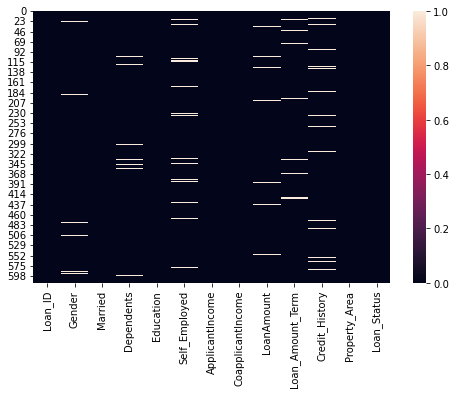

In [12]:
# Visualization of the Missing Data in seaborn
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

# Observations:

- Gender               13
- Married               3
- Dependents           15
- Self_Employed        32
- LoanAmount           22
- Loan_Amount_Term     14
- Credit_History       50

## Checking Unique Values:

In [13]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [14]:
df['Loan_ID'].is_unique # all unique

True

In [15]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

- nan Value Present in Gender Column

In [16]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

- nan value is present in married Column

In [17]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

- nan value is present in married Column

In [18]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [19]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

- nan value is present in Self_Employed column

In [20]:
df['ApplicantIncome'].is_unique

False

In [21]:
np.where(df['ApplicantIncome'].duplicated ())

(array([ 22,  38,  60,  64,  66,  72,  75,  76,  78,  83,  86,  87, 116,
        121, 124, 135, 136, 141, 156, 159, 166, 178, 179, 200, 203, 210,
        224, 227, 229, 233, 243, 252, 268, 278, 286, 293, 294, 298, 299,
        300, 302, 304, 307, 313, 316, 319, 320, 328, 329, 332, 336, 337,
        343, 344, 347, 353, 356, 358, 361, 366, 372, 376, 380, 382, 385,
        388, 392, 402, 416, 422, 425, 434, 437, 444, 446, 464, 465, 469,
        473, 479, 482, 484, 485, 488, 496, 505, 508, 515, 521, 530, 538,
        548, 552, 566, 567, 568, 569, 575, 582, 585, 588, 590, 591, 593,
        602, 604, 605, 606, 613], dtype=int64),)

In [22]:
df['CoapplicantIncome'].is_unique

False

In [23]:
df['LoanAmount'].is_unique

False

In [24]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [25]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [26]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

- nan value is present in Credit_History column

In [27]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [28]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

# Imputation on Null Value

#### Checking Missing Percentage " Gender "

In [29]:
Total_Gender=len(df['Gender'])
Gender_Missing=df['Gender'].isnull().sum()

print("Gender Missing percentage ",((Gender_Missing/Total_Gender)*100))

Gender Missing percentage  2.1172638436482085


#### Checking Missing Percentage " Married "

In [30]:
Total_Married  = len(df['Married'])
Married_Missing= df['Married'].isnull().sum() 

print("Married Missing percentage ",((Married_Missing/Total_Married)*100))

Married Missing percentage  0.4885993485342019


#### Checking Missing Percentage  " Dependents "

In [31]:
Total_Dependent  = len(df['Dependents'])
Dependent_Missing= df['Dependents'].isnull().sum() 

print("Dependent Missing percentage ",((Dependent_Missing/Total_Dependent)*100))

Dependent Missing percentage  2.44299674267101


#### Checking Missing Percentage  " Self_ Employed "

In [32]:
Total_Self_Employed  = len(df['Self_Employed'])
Self_Employed_Missing= df['Self_Employed'].isnull().sum() 

print("Total Self_ Employed Missing percentage ",((Self_Employed_Missing/Total_Self_Employed)*100))

Total Self_ Employed Missing percentage  5.211726384364821


#### Checking Missing Percentage  " LoanAmount "

In [33]:
Total_LoanAmount   = len(df['LoanAmount'])
LoanAmount_Missing= df['LoanAmount'].isnull().sum() 

print("Total LoanAmount Missing percentage ",((LoanAmount_Missing/Total_LoanAmount )*100))

Total LoanAmount Missing percentage  3.5830618892508146


#### Checking Missing Percentage  " Loan_Amount_Term "

In [34]:
Total_Loan_Amount_Term=len(df['Loan_Amount_Term'])
Loan_Amount_Term_Missing=df['Loan_Amount_Term'].isnull().sum()

print("Total Loan_Amount_Term Missing percentage ",(( Loan_Amount_Term_Missing/Total_Loan_Amount_Term)*100))

Total Loan_Amount_Term Missing percentage  2.2801302931596092


#### Checking Missing Percentage  " Credit_History "

In [35]:
Total_Credit_History  = len(df['Credit_History'])
Credit_History_Missing= df['Credit_History'].isnull().sum() 

print("Married Missing percentage ",((Credit_History_Missing/Total_Credit_History)*100))

Married Missing percentage  8.143322475570033


### However Missing Value is not more than 10 percentage we will go with imputation technique

In [36]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

category=['Gender','Married','Dependents','Self_Employed']
Quantative=['LoanAmount','Loan_Amount_Term','Credit_History']

for i in category:
    df[i]=si.fit_transform(df[i].values.reshape(-1,1))

In [37]:
sI=SimpleImputer(missing_values=np.nan,strategy='mean')

for i in Quantative:
    df[i]=sI.fit_transform(df[i].values.reshape(-1,1))

In [38]:
# Droping Loan Id as it doesn't add any values to target variable

df.drop(['Loan_ID'],axis=1,inplace=True)

# Rechecking Null Values

In [39]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

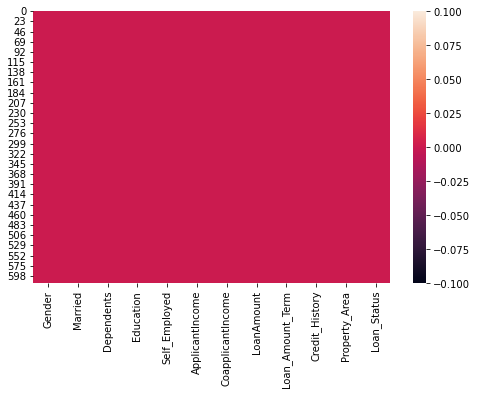

In [40]:
# Visualization of the Missing Data in seaborn
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

## Checking Duplicated Values in Data Frame

In [41]:
df.duplicated().sum()  # Nill Duplicated Count

0

## EDA("Exploratory Data Analysis")

# Uni-Variate Analysis

Total Gender Counts
 Male      502
Female    112
Name: Gender, dtype: int64


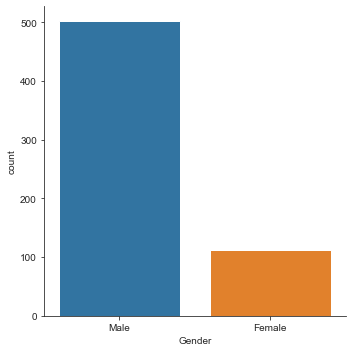

In [42]:
sns.set_style("ticks")
sns.catplot(x='Gender',data=df,kind='count',aspect=1)

print("Total Gender Counts\n",df['Gender'].value_counts())

Total Gender Counts who had taken Loan
- Male      502
- Female    112

 Total Married And Un-Married
 Yes    401
No     213
Name: Married, dtype: int64


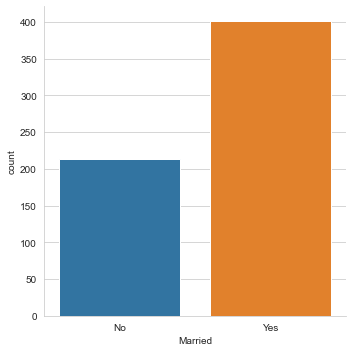

In [43]:
sns.set_style("whitegrid")
sns.catplot(x='Married',data=df,kind='count',aspect=1)
print(" Total Married And Un-Married\n",df['Married'].value_counts())

Graph(Name: Married) Shows:
    
- Married Counts are 401
- Total Un-Married are 213

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


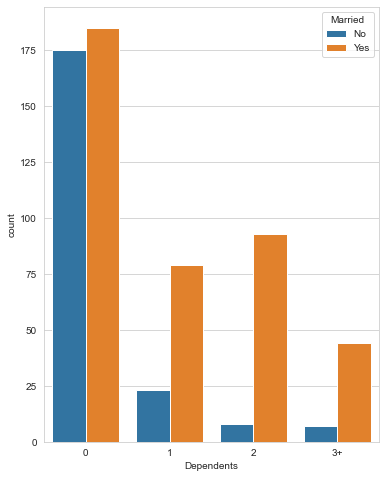

In [44]:
plt.figure(figsize=(6,8))
sns.countplot(x='Dependents',data=df,hue='Married')
print(df['Dependents'].value_counts())

Graph Shows:
- Zero Dependent = 360
- One Dependents = 102
- Two Dependents = 101
- Three Plus Dependents = 51

<AxesSubplot:xlabel='Dependents', ylabel='count'>

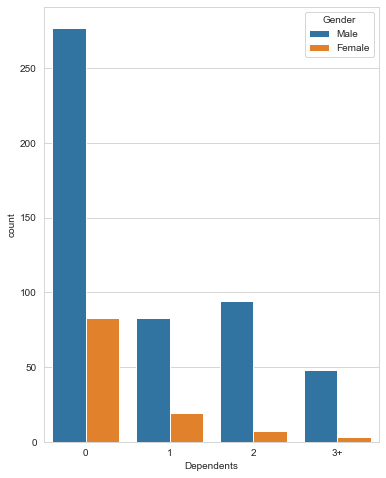

In [45]:
plt.figure(figsize=(6,8))
sns.countplot(x='Dependents',data=df,hue='Gender')

Male dependents are more then Female

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


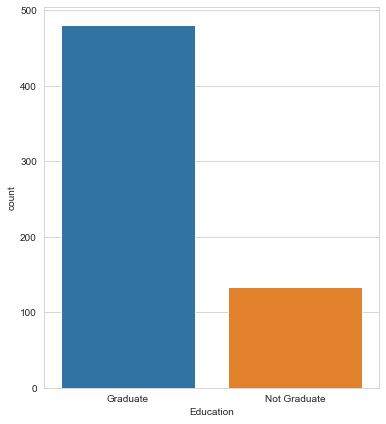

In [46]:
plt.figure(figsize=(6,7))
sns.countplot(data=df,x='Education')
print(df['Education'].value_counts())

Education Graph Shows:
- Graduate        480
- Not Graduate    134

No     532
Yes     82
Name: Self_Employed, dtype: int64


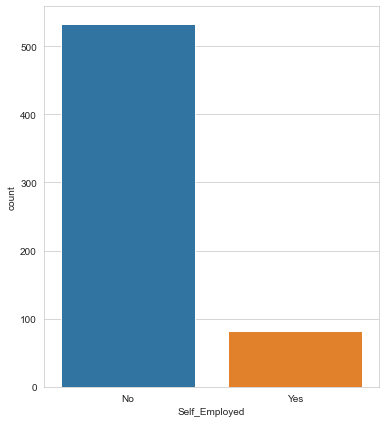

In [47]:
plt.figure(figsize=(6,7))
sns.countplot(data=df,x='Self_Employed')
print(df['Self_Employed'].value_counts())

Graph Name: Self_Employed 

- 532 are not Self_Employed
- 082 are Self_Employed

2500    9
4583    6
6000    6
2600    6
3333    5
Name: ApplicantIncome, dtype: int64


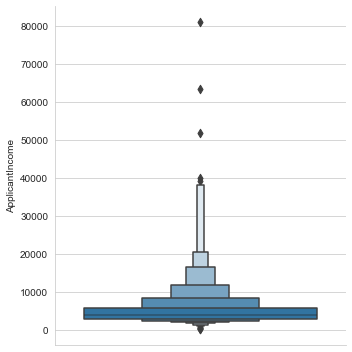

In [48]:
sns.catplot(y='ApplicantIncome',data=df,kind='boxen')
print(df['ApplicantIncome'].value_counts()[:5])

Maximum count lies between 0 to 1000

Minimum Income 150 And Maximum Income is  81000


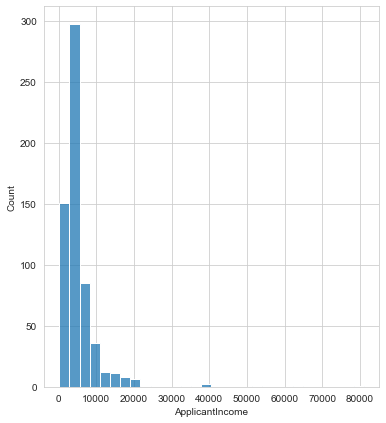

In [49]:
plt.figure(figsize=(6,7))
sns.histplot(x='ApplicantIncome',data=df,bins=30)
print("Minimum Income",df['ApplicantIncome'].min(),"And Maximum Income is ",df['ApplicantIncome'].max())

Maximum Prequency lies between 0 to 1000

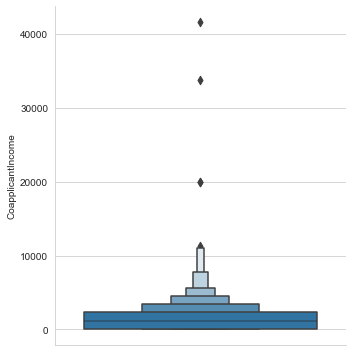

In [50]:
sns.catplot(y='CoapplicantIncome',data=df,kind='boxen')

Maximum points lies below approx 500

Minimum Income 0.0 And Maximum Income is  41667.0


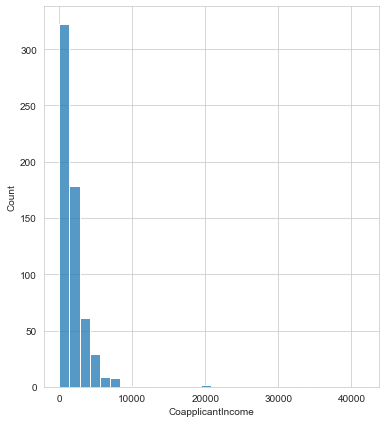

In [51]:
plt.figure(figsize=(6,7))
sns.histplot(x='CoapplicantIncome',data=df,bins=30)
print("Minimum Income",df['CoapplicantIncome'].min(),"And Maximum Income is ",df['CoapplicantIncome'].max())

Minimum LoanAmount 9.0 And Maximum LoanAmount is  700.0


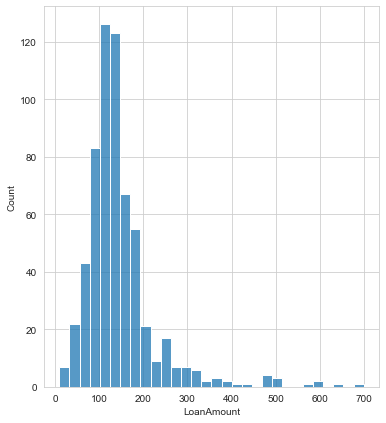

In [52]:
plt.figure(figsize=(6,7))
sns.histplot(x='LoanAmount',data=df,bins=30)
print("Minimum LoanAmount",df['LoanAmount'].min(),"And Maximum LoanAmount is ",df['LoanAmount'].max())

LoanAmount Shows
Minimum LoanAmount 9.0 And Maximum LoanAmount is  700.0
Maximum count lies at 100 t0 120

Minimum Loan_Amount_Term 12.0 And Maximum Loan_Amount_Term is  480.0


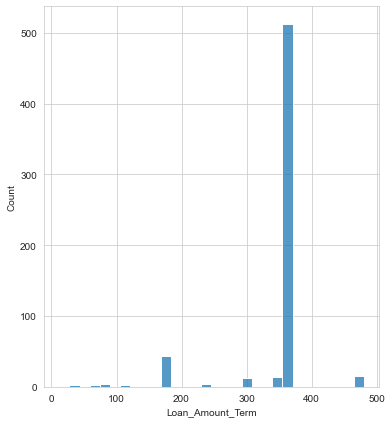

In [53]:
plt.figure(figsize=(6,7))
sns.histplot(x='Loan_Amount_Term',data=df,bins=30)
print("Minimum Loan_Amount_Term",df['Loan_Amount_Term'].min(),"And Maximum Loan_Amount_Term is ",df['Loan_Amount_Term'].max())

- Minimum Loan_Amount_Term 12.0 And Maximum Loan_Amount_Term is  480.0
- Maximum loan term lies between 300 to 400

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


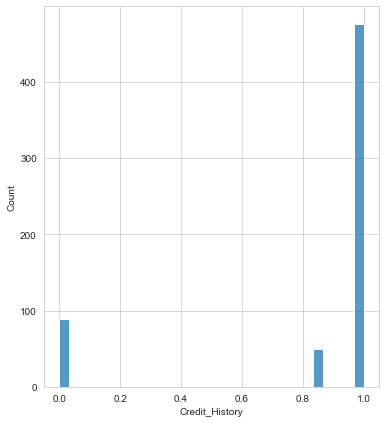

In [54]:
plt.figure(figsize=(6,7))
sns.histplot(x='Credit_History',data=df,bins=30)
print(df['Credit_History'].value_counts())

Graph Shows
- 1.000000  counts  475
- 0.000000  counts  89
- 0.842199  counts  50


Minimum Credit_History 0.0 And Maximum Credit_History is  1.0


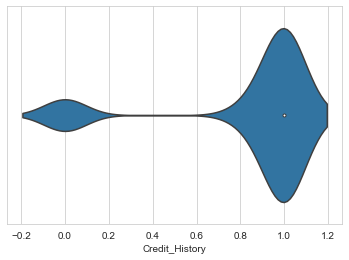

In [55]:
sns.violinplot(x='Credit_History',data=df)
print("Minimum Credit_History",df['Credit_History'].min(),"And Maximum Credit_History is ",df['Credit_History'].max())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

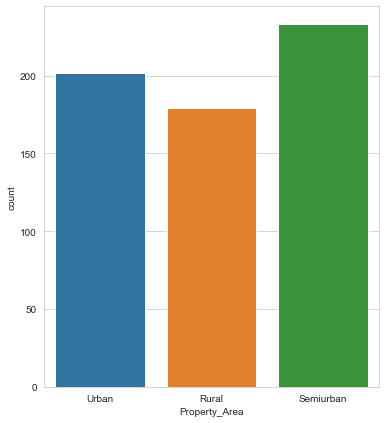

In [56]:
plt.figure(figsize=(6,7))
sns.countplot(data=df,x='Property_Area')
df['Property_Area'].value_counts()

Property count
- Semiurban    233
- Urban        202
- Rural        179

Y    422
N    192
Name: Loan_Status, dtype: int64

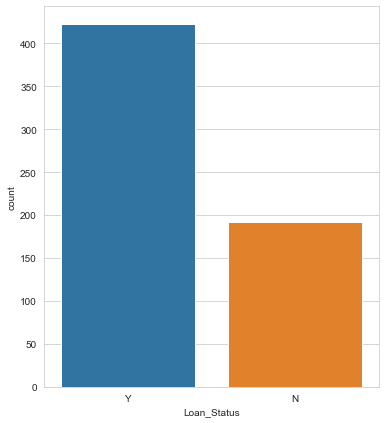

In [57]:
plt.figure(figsize=(6,7))
sns.countplot(x='Loan_Status',data=df)
df['Loan_Status'].value_counts()

Total Approved Loan is 422 and Not Approved Loan  is  192

Y    422
N    192
Name: Loan_Status, dtype: int64

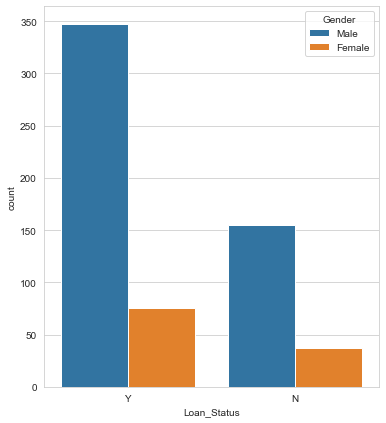

In [58]:
plt.figure(figsize=(6,7))
sns.countplot(x='Loan_Status',hue='Gender',data=df)
df['Loan_Status'].value_counts()

Graph Shows

- Approved    422
- Not-Approved    192

# Bi-Variate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

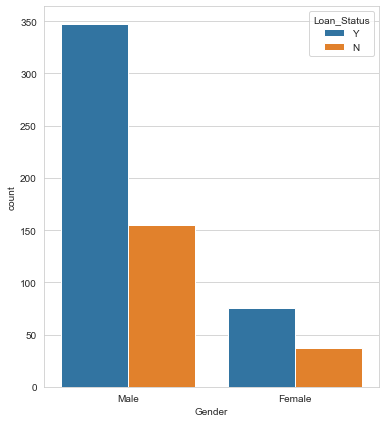

In [59]:
plt.figure(figsize=(6,7))
sns.countplot(x='Gender',hue='Loan_Status',data=df)

Approval of Male is more than Female

<Figure size 432x504 with 0 Axes>

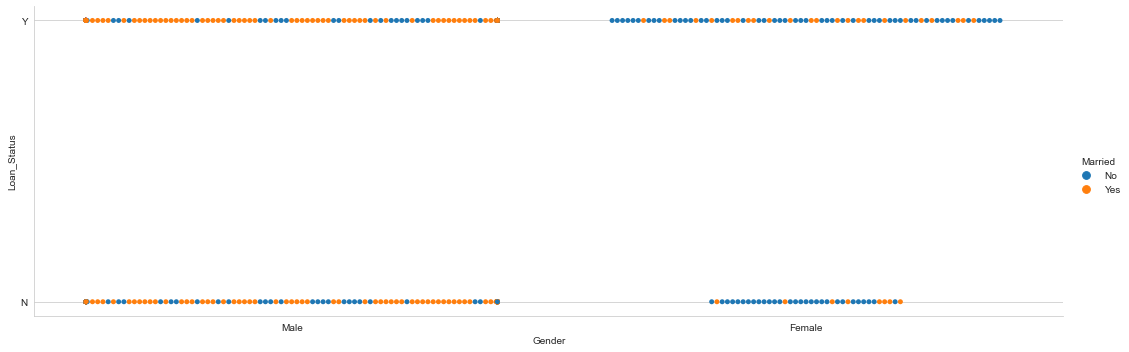

In [60]:
plt.figure(figsize=(6,7))
sns.catplot(x='Gender',y='Loan_Status',kind='swarm',data=df,aspect=3,hue='Married')

- Male Loan Approval for loan is more for married.
- Female Loan Approval for married in Female is less after Marriage

<Figure size 432x504 with 0 Axes>

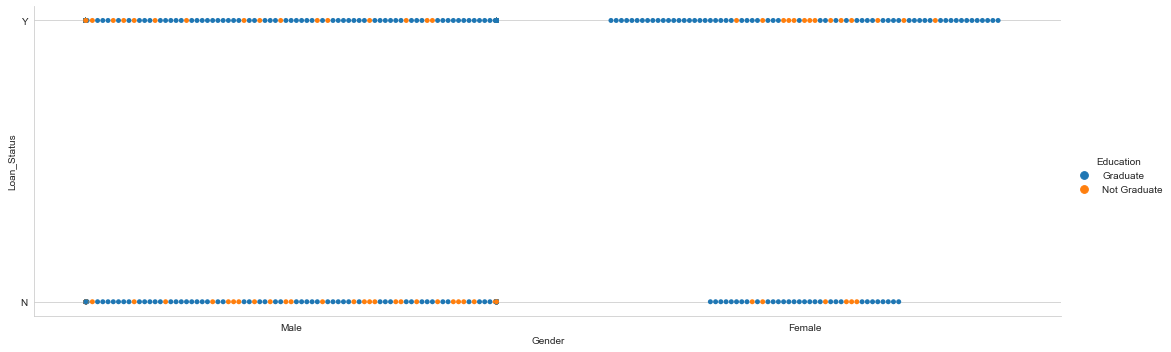

In [61]:
plt.figure(figsize=(6,7))
sns.catplot(x='Gender',y='Loan_Status',kind='swarm',data=df,aspect=3,hue='Education')

- Graduate Male and Female Loan approval is more

<Figure size 432x504 with 0 Axes>

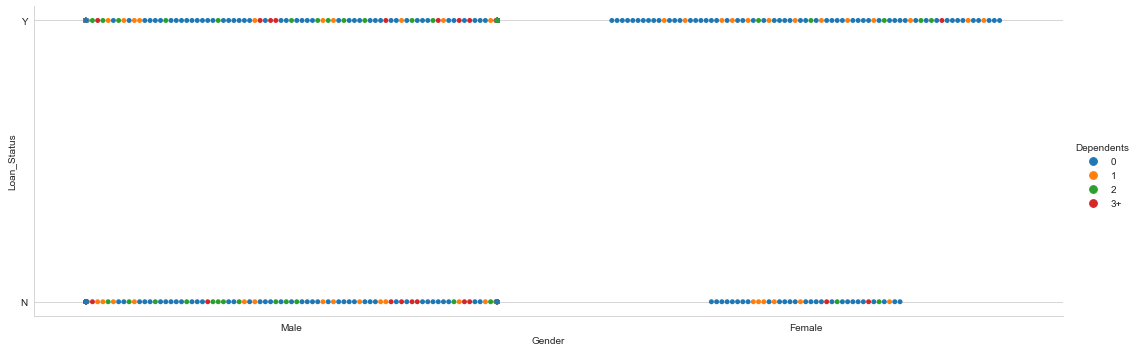

In [62]:
plt.figure(figsize=(6,7))
sns.catplot(x='Gender',y='Loan_Status',kind='swarm',data=df,aspect=3,hue='Dependents')

Male with dependents have more approval then Female

<Figure size 432x504 with 0 Axes>

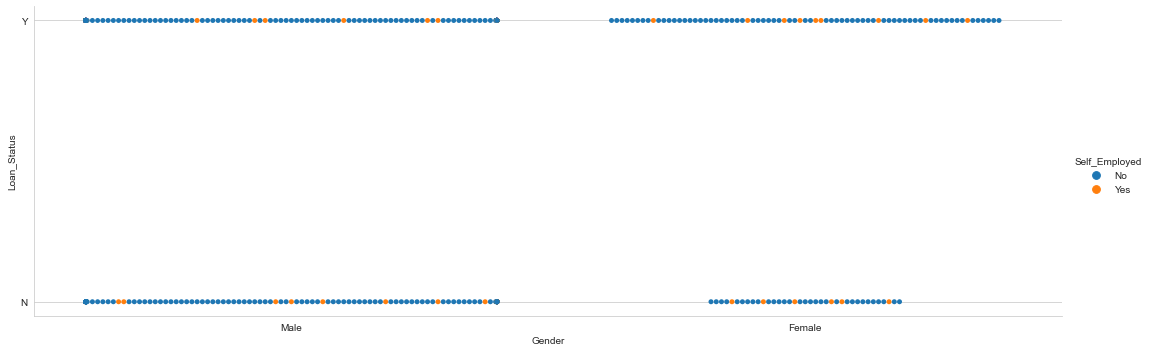

In [63]:
plt.figure(figsize=(6,7))
sns.catplot(x='Gender',y='Loan_Status',kind='swarm',data=df,aspect=3,hue='Self_Employed')

# Label Encoding for Target Variable

In [64]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Loan_Status']=le.fit_transform(df['Loan_Status'])

# New unique value shows Y=1,N=0

df['Loan_Status'].unique()

array([1, 0])

<Figure size 432x504 with 0 Axes>

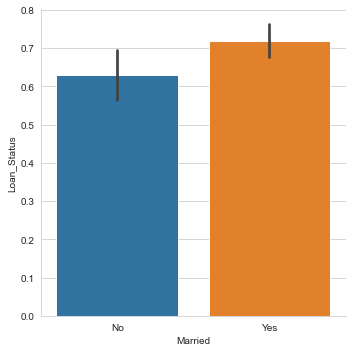

In [66]:
plt.figure(figsize=(6,7))
sns.catplot(x='Married',y='Loan_Status',data=df,kind='bar')

Approval After Marriage is More

<Figure size 432x504 with 0 Axes>

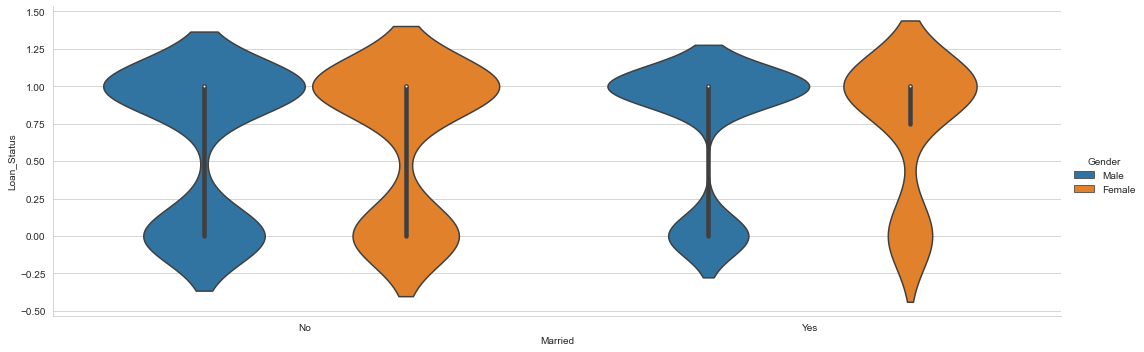

In [67]:
plt.figure(figsize=(6,7))
sns.catplot(x='Married',y='Loan_Status',data=df,kind='violin',hue='Gender',aspect=3,)

- Female apply more for loan then Male
- Loan requirements are high after marriage

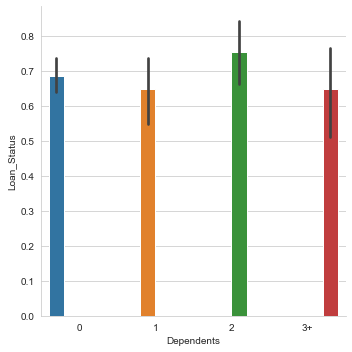

In [68]:
sns.catplot(x='Dependents',y='Loan_Status',data=df,kind='bar',hue='Dependents',)

Depends with 2 and 0 is more compare to one and 3+

<Figure size 432x504 with 0 Axes>

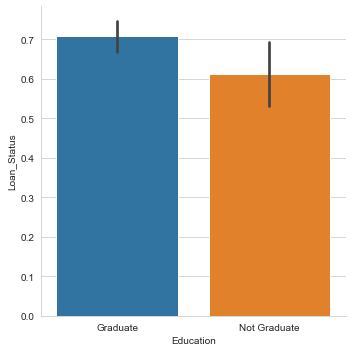

In [69]:
plt.figure(figsize=(6,7))
sns.catplot(x='Education',y='Loan_Status',data=df,kind='bar')

Approval is more for Graduate

<Figure size 432x504 with 0 Axes>

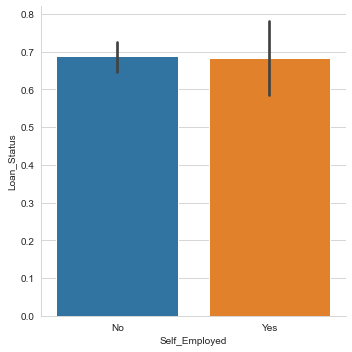

In [70]:
plt.figure(figsize=(6,7))
sns.catplot(x='Self_Employed',y='Loan_Status',data=df,kind='bar')

Requirements are same for them
Approval for Self_Employed is high 

<Figure size 432x504 with 0 Axes>

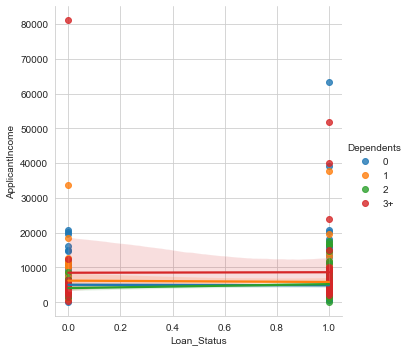

In [71]:
plt.figure(figsize=(6,7))
sns.lmplot(y='ApplicantIncome',x='Loan_Status',data=df,hue='Dependents')

Shows No good relation. but 50 50 change of approval

<Figure size 432x504 with 0 Axes>

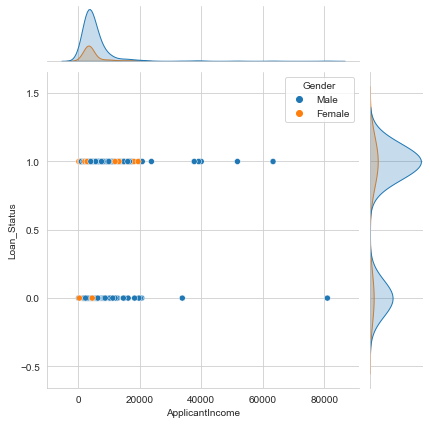

In [72]:
plt.figure(figsize=(6,7))
sns.jointplot(x='ApplicantIncome',y='Loan_Status',data=df,hue='Gender')

<Figure size 432x504 with 0 Axes>

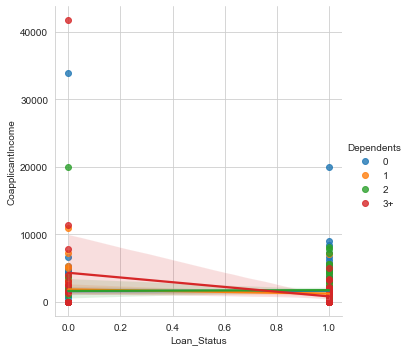

In [73]:
plt.figure(figsize=(6,7))
sns.lmplot(y='CoapplicantIncome',x='Loan_Status',data=df,hue='Dependents')

Approval for 3+ Dependents goes down

<Figure size 432x504 with 0 Axes>

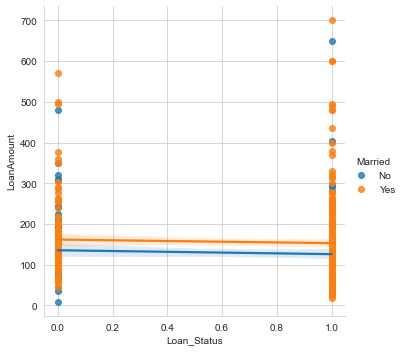

In [74]:
plt.figure(figsize=(6,7))
sns.lmplot(y='LoanAmount',x='Loan_Status',data=df,fit_reg = True,hue='Married')

Loan Amount is Not having good relation to loan Approval

<Figure size 432x504 with 0 Axes>

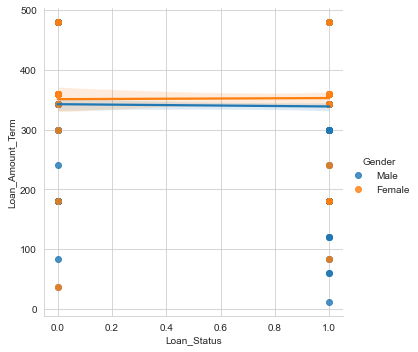

In [75]:
plt.figure(figsize=(6,7))
sns.lmplot(y='Loan_Amount_Term',x='Loan_Status',data=df,hue='Gender')

Approval is more in loan tearm 300 too 400 

<Figure size 432x504 with 0 Axes>

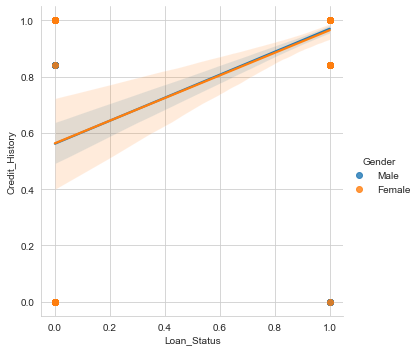

In [76]:
plt.figure(figsize=(6,7))
sns.lmplot(y='Credit_History',x='Loan_Status',data=df,hue='Gender')

credit_History is positive toward Loan_Status

<Figure size 432x504 with 0 Axes>

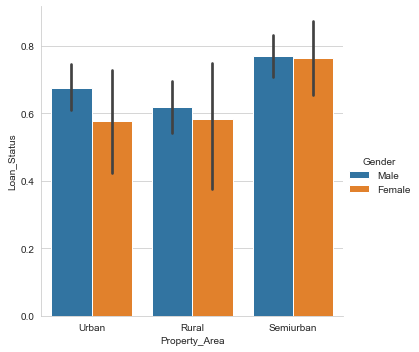

In [77]:
plt.figure(figsize=(6,7))
sns.catplot(x='Property_Area',y='Loan_Status',data=df,hue='Gender',kind='bar')

Loan requirement is more Semi-Urban area

# Multi-Variate Analysis

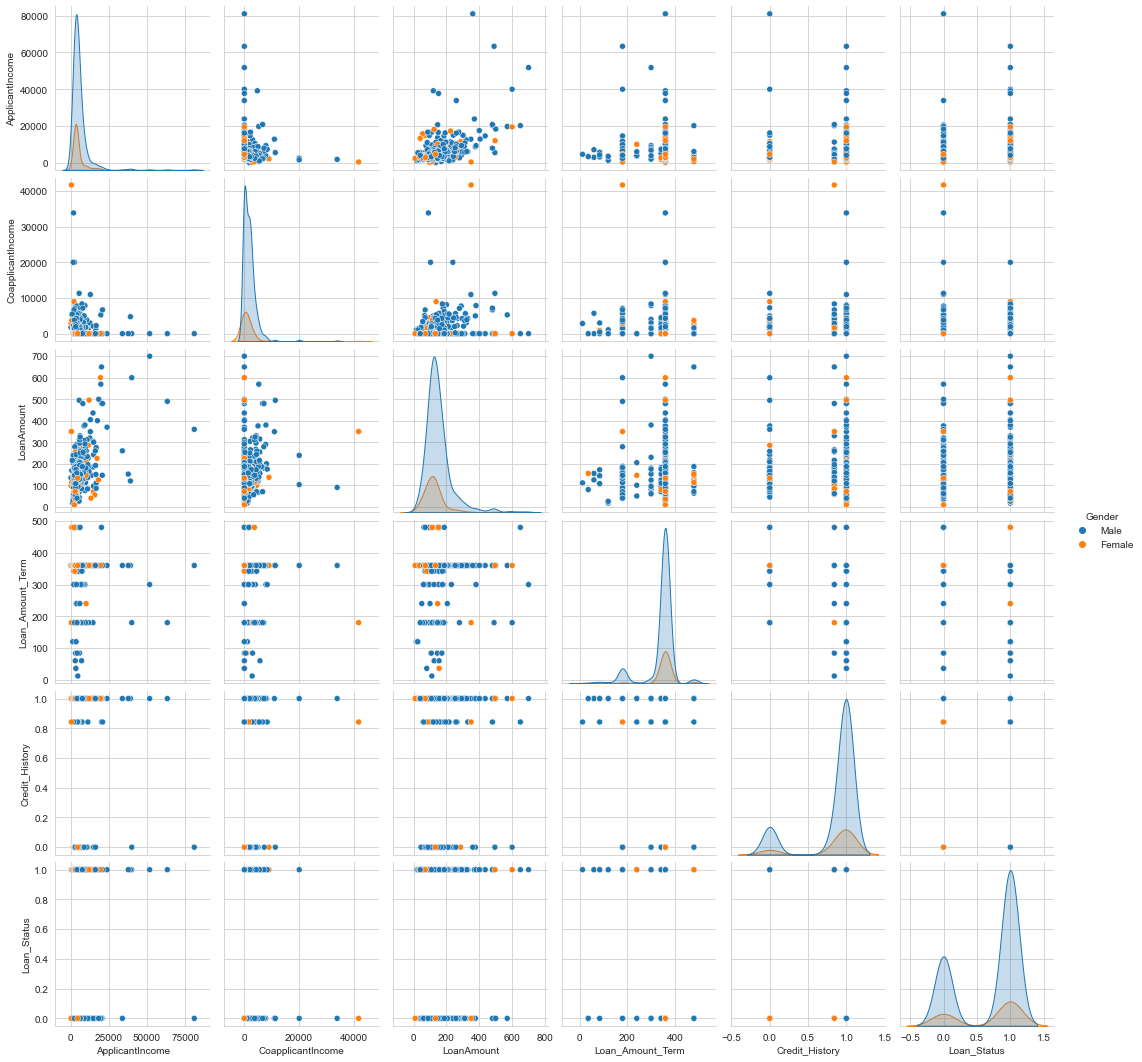

In [78]:
sns.pairplot(df,hue='Gender')

# Feature Engeering

In [79]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [80]:
df['Dependents']=df['Dependents'].replace(['3+'],'4')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


# Label Encoder

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

In [83]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Descriptive Statistics:

In [84]:
df.describe() # descriptive graph

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


# Observations

- Null Values: No Null Values
- RightSkewed: ApplicantIncome, CoapplicantIncome, LoanAmount, 
- Left Skewed: Loan_Amount_Term	
- Standard Deviation: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term
- Outliers: CoapplicantIncome, LoanAmount, Loan_Amount_Term

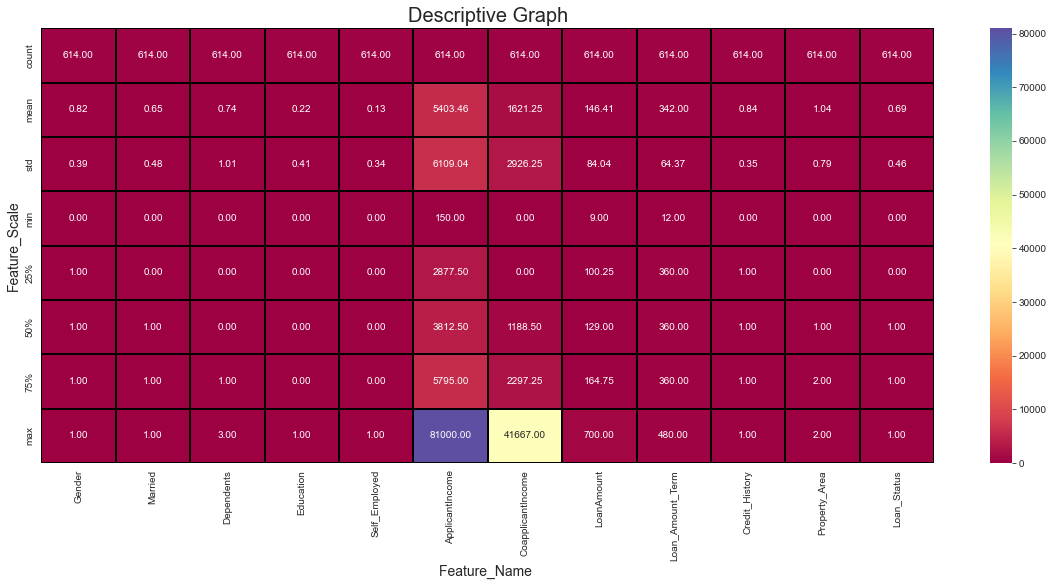

In [85]:
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),annot=True,linewidth=0.2,linecolor='black',fmt='0.2f',cmap='Spectral')
plt.xlabel("Feature_Name ",fontsize=14)
plt.ylabel("Feature_Scale",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

# Correlation:

In [86]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


Text(0.5, 1.0, 'Correlation Graph')

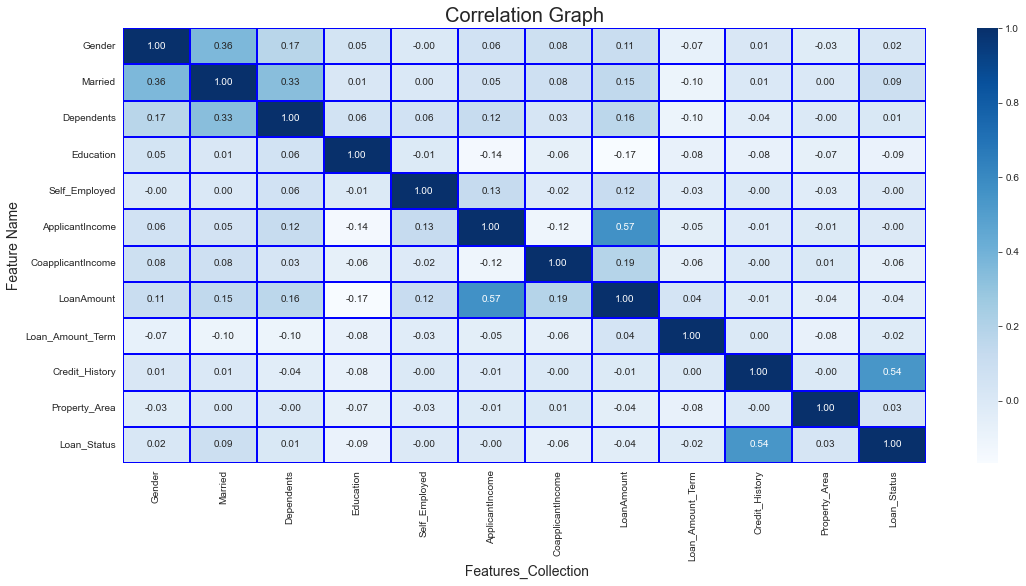

In [87]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='blue',square=False,cmap='Blues')
plt.xlabel(" Features_Collection",fontsize=14)
plt.ylabel(" Feature Name ",fontsize=14)
plt.title("Correlation Graph",fontsize=20)

In [88]:
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Correlation Graph')

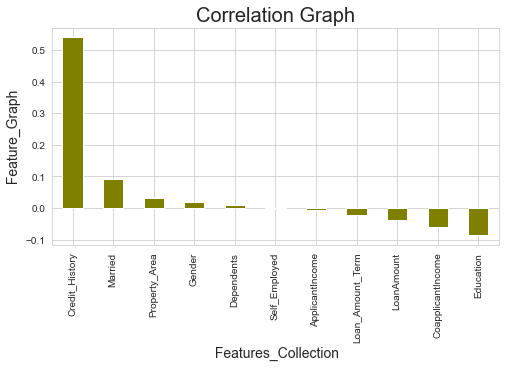

In [89]:
plt.figure(figsize=(8,4))
df.corr()['Loan_Status'].sort_values(ascending=False).drop('Loan_Status').plot(kind='bar',color='olive')
plt.xlabel(" Features_Collection",fontsize=14)
plt.ylabel(" Feature_Graph ",fontsize=14)
plt.title("Correlation Graph",fontsize=20)

# Observation:

- Education is 9 percent Negatively Correlated with Target Variable.
- CoapplicantIncome is 6 percent Negatively Correlated with Target Variable.
- LoanAmount is 4 percent Negatively correlated with Target Variable.
- Loan_Amount_Term is 2 percent Negatively Correlated with Target Variable.
- ApplicantIncome is 0 percent Negatively Correlated with Target Variable.
- Self_Employed is 0 percent Negatively Correlated with Target Variable.
- Dependents is 1 percent Positively Correlated with Target Variable.
- Gender is 1 percent Positively Correlated with Target Variable.
- Property_Area is 3 Percent Positively Correlated with Target Variable.
- Married is 9 percent Positively Correlated with Target Variable.
- Credit_History is 54 percent Positively Correlated with Target Variable.
- Loan_Status is 100 percent correlated with Target Variable.

Credit_History is Postively Related

Education is 9 percentage Negatively Related

# Outliers

<AxesSubplot:xlabel='Gender'>

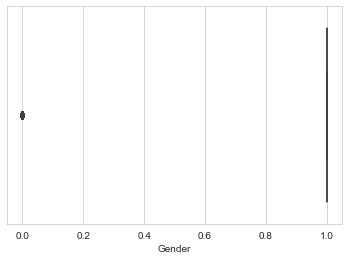

In [90]:
sns.set_style('whitegrid')
sns.boxplot(x='Gender',data=df)

Shows Outlier but Category Variable

{'whiskers': [<matplotlib.lines.Line2D at 0x152c188d340>,
 'caps': [<matplotlib.lines.Line2D at 0x152c188d8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x152c188d040>],
 'medians': [<matplotlib.lines.Line2D at 0x152c188de80>],
 'fliers': [<matplotlib.lines.Line2D at 0x152c189d190>],
 'means': []}

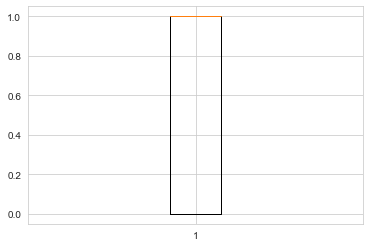

In [91]:
plt.boxplot(x='Married',data=df)

Shows No Outlier but Category Variable

{'whiskers': [<matplotlib.lines.Line2D at 0x152c18ef520>,
 'caps': [<matplotlib.lines.Line2D at 0x152c18efac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x152c18ef250>],
 'medians': [<matplotlib.lines.Line2D at 0x152c18fb0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x152c18fb370>],
 'means': []}

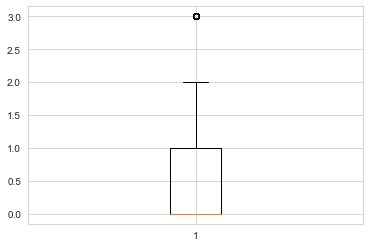

In [92]:
plt.boxplot(x='Dependents',data=df)

Shows Outlier but Category Variable

<AxesSubplot:xlabel='Education'>

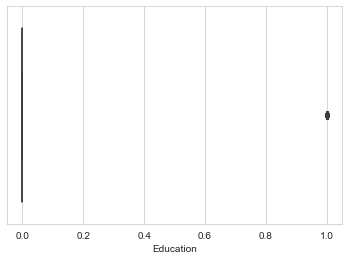

In [93]:
sns.boxplot(data=df,x='Education')

Shows Outlier but Category Variable

<AxesSubplot:xlabel='Dependents'>

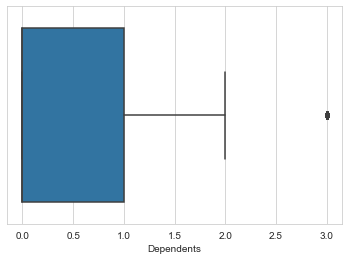

In [94]:
sns.boxplot(data=df,x='Dependents')

Shows Outlier but Category Variable

<AxesSubplot:xlabel='Education'>

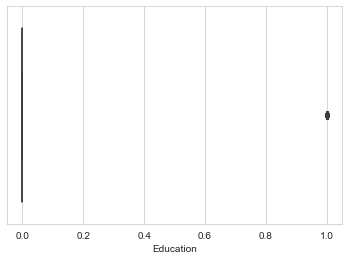

In [95]:
sns.boxplot(x='Education',data=df)

Shows Outlier but Category Variable

<AxesSubplot:xlabel='Self_Employed'>

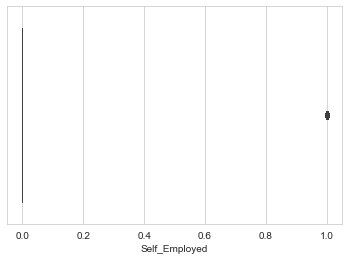

In [96]:
sns.boxplot(x='Self_Employed',data=df,dodge=True,fliersize=5,linewidth=1)

Shows Outlier but Category Variable

<AxesSubplot:xlabel='ApplicantIncome'>

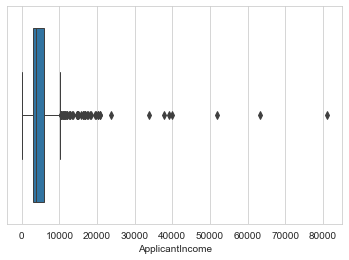

In [97]:
sns.boxplot(x='ApplicantIncome',data=df,dodge=True,fliersize=5,linewidth=1)

Graph Shows Alot of Outlier 

<AxesSubplot:xlabel='CoapplicantIncome'>

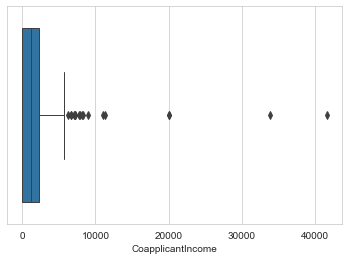

In [98]:
sns.boxplot(x='CoapplicantIncome',data=df,dodge=True,fliersize=5,linewidth=1)

Graph Shows Alot of Outlier 

<AxesSubplot:xlabel='LoanAmount'>

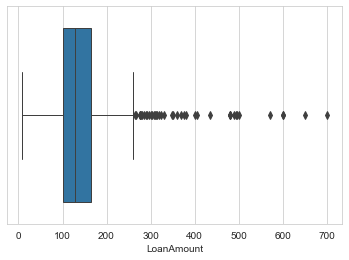

In [99]:
sns.boxplot(x='LoanAmount',data=df,dodge=True,fliersize=5,linewidth=1)

Graph Shows Alot of Outlier 

<AxesSubplot:xlabel='Loan_Amount_Term'>

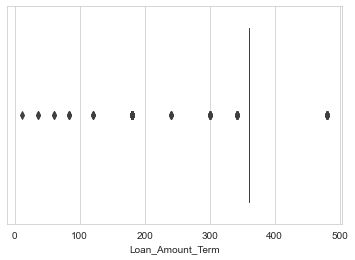

In [100]:
sns.boxplot(x='Loan_Amount_Term',data=df,dodge=True,fliersize=5,linewidth=1)

Graph Shows Alot of Outlier 

<AxesSubplot:xlabel='Credit_History'>

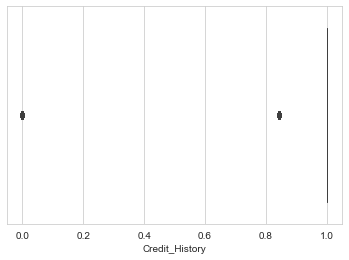

In [101]:
sns.boxplot(x='Credit_History',data=df,dodge=True,fliersize=5,linewidth=1)

Graph Shows Outlier 

<AxesSubplot:xlabel='Property_Area'>

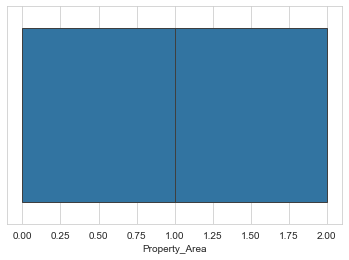

In [102]:
sns.boxplot(x='Property_Area',data=df,dodge=True,fliersize=5,linewidth=1)

Graph Shows NO Outlier 

<AxesSubplot:xlabel='Loan_Status'>

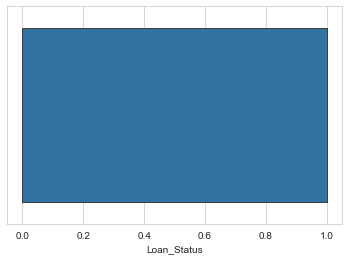

In [103]:
sns.boxplot(x='Loan_Status',data=df,dodge=True,fliersize=5,linewidth=1)

Graph Shows No Outlier 

## Observation:

- 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'===> Shows Maximum Outliers
- 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History'==> Shows Nominal Outliers

'Loan_Status'==> Target Variable


# Skewness

In [104]:
df.skew().sort_values()

Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Gender              -1.648795
Loan_Status         -0.809998
Married             -0.644850
Property_Area       -0.066196
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
LoanAmount           2.726601
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

Skewness Threshold is taken is(+/-65).

Outcome shows, Column showing skewness are..

- Loan_Amount_Term    -2.389680
- Credit_History      -1.963600
- Gender              -1.648795
- Loan_Status         -0.809998
- Dependents           1.015551
- Education            1.367622
- Self_Employed        2.159796
- LoanAmount           2.726601
- ApplicantIncome      6.539513
- CoapplicantIncome    7.491531

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

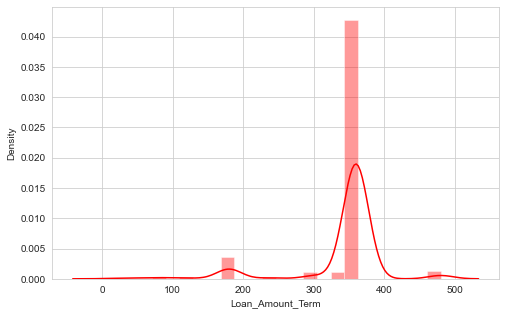

In [105]:
plt.figure(figsize=(8,5))
sns.distplot(df['Loan_Amount_Term'],color='r')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Tri-Modal)

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

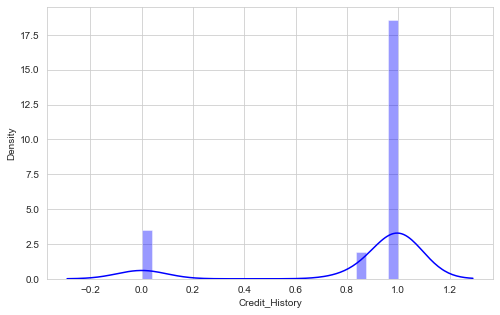

In [106]:
plt.figure(figsize=(8,5))
sns.distplot(df['Credit_History'],color='b')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

<AxesSubplot:xlabel='Gender', ylabel='Density'>

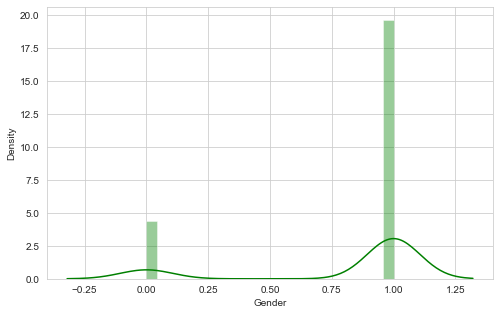

In [107]:
plt.figure(figsize=(8,5))
sns.distplot(df['Gender'],color='g')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

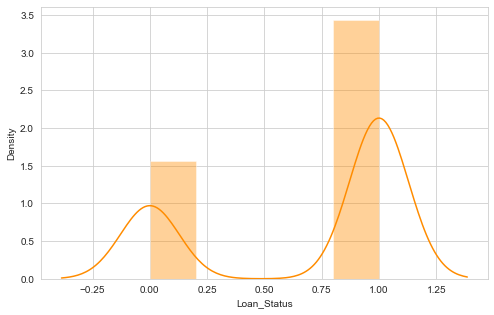

In [108]:
plt.figure(figsize=(8,5))
sns.distplot(df['Loan_Status'],color='darkorange')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

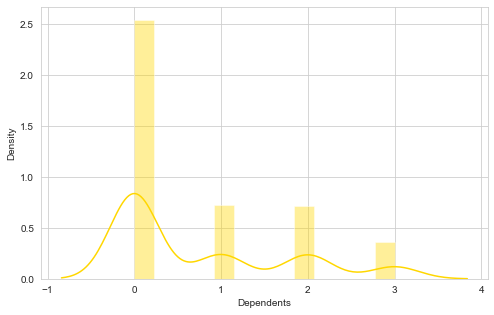

In [109]:
plt.figure(figsize=(8,5))
sns.distplot(df['Dependents'],color='gold')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Multi-Modal)

<AxesSubplot:xlabel='Education', ylabel='Density'>

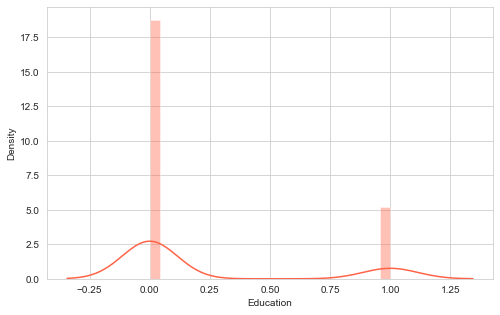

In [110]:
plt.figure(figsize=(8,5))
sns.distplot(df['Education'],color='tomato')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

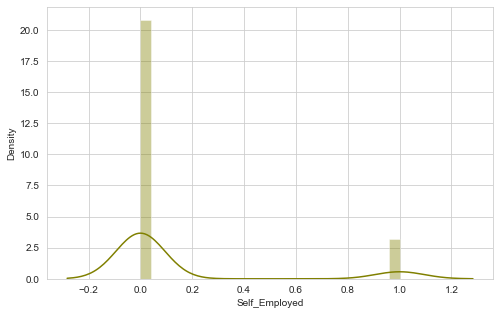

In [111]:
plt.figure(figsize=(8,5))
sns.distplot(df['Self_Employed'],color='olive')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

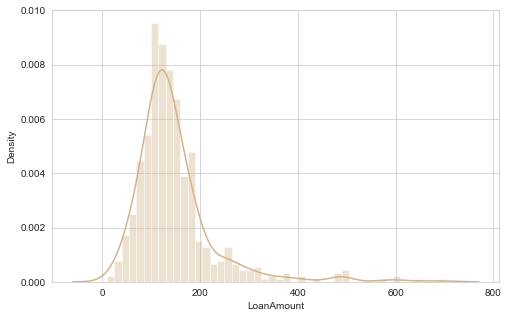

In [112]:
plt.figure(figsize=(8,5))
sns.distplot(df['LoanAmount'],color='tan')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Tri-Modal)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

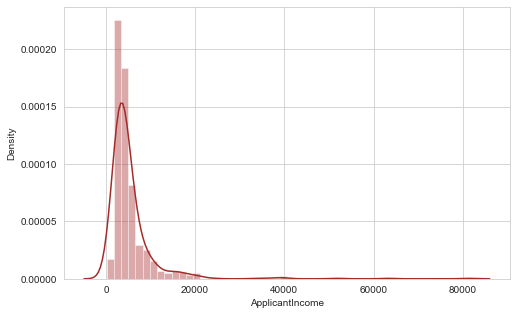

In [113]:
plt.figure(figsize=(8,5))
sns.distplot(df['ApplicantIncome'],color='brown')

The data in the Graph is not normalised, as the graph lies beyond the normal graph 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

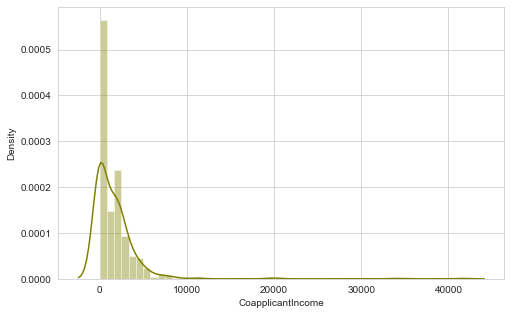

In [114]:
plt.figure(figsize=(8,5))
sns.distplot(df['CoapplicantIncome'],color='olive')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

# Data Cleansing:

In [115]:
df.corr().Loan_Status.sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [116]:
delete=pd.DataFrame(data={'Columns':['Education','ApplicantIncome','Self_Employed','Gender'],
                         'Values':[-0.085884,-0.004710,-0.003700,0.017987],
                         'Outliers':['yes','Alot','Alot','NO'],
                         'Normalised':['No','No','No','No']})
delete

,Columns,Values,Outliers,Normalised
0,Education,-0.085884,yes,No
1,ApplicantIncome,-0.004710,Alot,No
2,Self_Employed,-0.003700,Alot,No
3,Gender,0.017987,NO,No


In [117]:
df.drop(['Education','ApplicantIncome','Self_Employed','Gender'],axis=1,inplace=True)

## Cleaning Outliers:

In [118]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [119]:
z.head()

,Married,Dependents,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.372089,0.737806,0.554487,0.000000,0.279851,0.45164,1.223298,0.674519
1,0.728816,0.253470,0.038732,0.219273,0.279851,0.45164,1.318513,1.482537
2,0.728816,0.737806,0.554487,0.957641,0.279851,0.45164,1.223298,0.674519
3,0.728816,0.737806,0.251980,0.314547,0.279851,0.45164,1.223298,0.674519
4,1.372089,0.737806,0.554487,0.064454,0.279851,0.45164,1.223298,0.674519


In [120]:
np.where(z>3) #values where z is greater than 3

(array([  9,  14,  68,  94, 130, 133, 155, 171, 177, 177, 242, 262, 278,
        308, 313, 333, 369, 402, 417, 432, 487, 495, 497, 506, 523, 525,
        546, 561, 575, 581, 585, 600, 604], dtype=int64),
 array([2, 4, 4, 4, 3, 4, 3, 3, 2, 3, 4, 4, 3, 3, 4, 3, 3, 2, 2, 3, 3, 4,
        4, 3, 3, 3, 4, 3, 4, 2, 4, 2, 3], dtype=int64))

In [121]:
z.iloc[9,2] #sample

3.196712546212882

In [122]:
#new_df
new_df=df[(z<3).all(axis=1)]

In [123]:
new_df.head(4)

,Married,Dependents,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0.0,146.412162,360.0,1.0,2,1
1,1,1,1508.0,128.000000,360.0,1.0,0,0
2,1,0,0.0,66.000000,360.0,1.0,2,1
3,1,0,2358.0,120.000000,360.0,1.0,2,1


## Data Loss Percentage

In [124]:
print("Old Data Frame",df.shape[0])
print("New Data Frame",new_df.shape[0])

Old Data Frame 614
New Data Frame 582


In [125]:
print("Data Loss Percentage ",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Data Loss Percentage  5.211726384364821


#### However the data lost would be around 5 percent we will proceed with same

In [126]:
new_df.head(5)

,Married,Dependents,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0.0,146.412162,360.0,1.0,2,1
1,1,1,1508.0,128.000000,360.0,1.0,0,0
2,1,0,0.0,66.000000,360.0,1.0,2,1
3,1,0,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0.0,141.000000,360.0,1.0,2,1


In [127]:
x=new_df.iloc[:,0:-1] # x_data
y=new_df.iloc[:,-1] #y_data

In [128]:
print("New_shape of x is ",x.shape," New_shape for y is ",y.shape)

New_shape of x is  (582, 7)  New_shape for y is  (582,)


In [129]:
x.columns

Index(['Married', 'Dependents', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer(output_distribution='uniform', n_quantiles=100)
x['Credit_History']=qt.fit_transform(x['Credit_History'].values.reshape(-1,1))
x['Loan_Amount_Term']=qt.fit_transform(x['Loan_Amount_Term'].values.reshape(-1,1))

# Remove Skewness

In [130]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson',standardize=True)

In [131]:
x

array([[-1.36638028, -0.81446291, -1.11576477, ...,  0.14165555,
         0.51500788,  1.1995706 ],
       [ 0.73186068,  0.88879172,  0.75131953, ...,  0.14165555,
         0.51500788, -1.33846698],
       [ 0.73186068, -0.81446291, -1.11576477, ...,  0.14165555,
         0.51500788,  1.1995706 ],
       ...,
       [ 0.73186068,  0.88879172,  0.18647891, ...,  0.14165555,
         0.51500788,  1.1995706 ],
       [ 0.73186068,  1.3365945 , -1.11576477, ...,  0.14165555,
         0.51500788,  1.1995706 ],
       [-1.36638028, -0.81446291, -1.11576477, ...,  0.14165555,
        -2.22311576,  0.02198156]])

In [132]:
x=pd.DataFrame(data=x,columns=['Married', 'Dependents', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
x

,Married,Dependents,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.366380,-0.814463,-1.115765,0.303317,0.141656,0.515008,1.199571
1,0.731861,0.888792,0.751320,-0.023043,0.141656,0.515008,-1.338467
2,0.731861,-0.814463,-1.115765,-1.443031,0.141656,0.515008,1.199571
3,0.731861,-0.814463,0.900672,-0.174905,0.141656,0.515008,1.199571
4,-1.366380,-0.814463,-1.115765,0.210450,0.141656,0.515008,1.199571
...,...,...,...,...,...,...,...
577,-1.366380,-0.814463,-1.115765,-1.300788,0.141656,0.515008,-1.338467
578,0.731861,1.530271,-1.115765,-2.333149,-2.568844,0.515008,-1.338467
579,0.731861,0.888792,0.186479,1.783712,0.141656,0.515008,1.199571
580,0.731861,1.336594,-1.115765,0.934205,0.141656,0.515008,1.199571


In [133]:
x.skew()

Married             -0.636160
Dependents           0.467609
CoapplicantIncome   -0.181155
LoanAmount           0.047554
Loan_Amount_Term     0.727593
Credit_History      -1.588724
Property_Area       -0.152602
dtype: float64

In [134]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer(output_distribution='uniform', n_quantiles=1000)
x['Credit_History']=qt.fit_transform(x['Credit_History'].values.reshape(-1,1))

In [135]:
x.skew()

Married             -0.636160
Dependents           0.467609
CoapplicantIncome   -0.181155
LoanAmount           0.047554
Loan_Amount_Term     0.727593
Credit_History      -1.347525
Property_Area       -0.152602
dtype: float64

In [136]:
x['Credit_History']=np.sqrt(x['Credit_History']-3)

In [137]:
x.skew()

Married             -0.636160
Dependents           0.467609
CoapplicantIncome   -0.181155
LoanAmount           0.047554
Loan_Amount_Term     0.727593
Credit_History            NaN
Property_Area       -0.152602
dtype: float64

In [138]:
x.drop(['Credit_History'],axis=1,inplace=True)

In [139]:
# after removing skewness
x.skew()

Married             -0.636160
Dependents           0.467609
CoapplicantIncome   -0.181155
LoanAmount           0.047554
Loan_Amount_Term     0.727593
Property_Area       -0.152602
dtype: float64

# Standard Scaler

In [140]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(x)

In [141]:
print("Mean Value",round(x.mean(),2),"Standard_ Deviation",round(x.std(),2))

Mean Value 0.0 Standard_ Deviation 1.0


In [142]:
x.shape

(582, 6)

# Logistic Regression

In [143]:
y.value_counts()

1    401
0    181
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

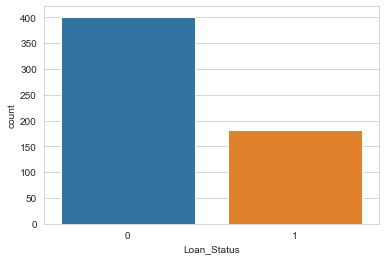

In [144]:
plt.figure(figsize=(6,4))
sns.countplot(x=y,data=y)

In [145]:
# Data is Imbalance so we will use SMOTE technique:

from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

1    401
0    401
Name: Loan_Status, dtype: int64

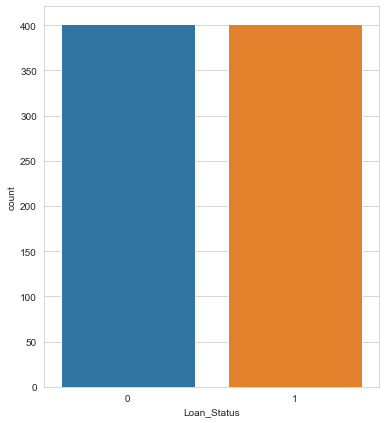

In [146]:
plt.figure(figsize=(6,7))
sns.countplot(x=y,data=y)
y.value_counts()

# Model Selection:

In [147]:
#importing library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [148]:
lg=LogisticRegression()

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(x_train,y_train) #sent for training
    pred_train=lg.predict(x_train) #predict(x_training data)
    pred_test=lg.predict(x_test)  #predict(x_test dataset)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("The random state:-",i)
        print("Training accuracy_score is ",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is ",accuracy_score(y_test,pred_test)*100,"\n")

The random state:- 117
Training accuracy_score is  57.09828393135725
Testing accuracy_score is  57.14285714285714 

The random state:- 142
Training accuracy_score is  56.47425897035882
Testing accuracy_score is  56.52173913043478 

The random state:- 237
Training accuracy_score is  56.47425897035882
Testing accuracy_score is  56.52173913043478 

The random state:- 603
Training accuracy_score is  55.85023400936038
Testing accuracy_score is  55.90062111801242 

The random state:- 618
Training accuracy_score is  57.09828393135725
Testing accuracy_score is  57.14285714285714 

The random state:- 664
Training accuracy_score is  56.47425897035882
Testing accuracy_score is  56.52173913043478 

The random state:- 858
Training accuracy_score is  55.85023400936038
Testing accuracy_score is  55.90062111801242 

The random state:- 863
Training accuracy_score is  55.85023400936038
Testing accuracy_score is  55.90062111801242 

The random state:- 896
Training accuracy_score is  55.85023400936038
Tes

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=117,test_size=0.20)

#train and score
lg.fit(x_train,y_train)
lg_score=lg.score(x_train,y_train)

#predict
pred_train = lg.predict(x_train)
pred_test  = lg.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_test,pred_test),'\n',"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test),"\n")
print("Classification Report \n",classification_report(y_test,pred_test),'\n\n')

Accuracy Training Score = 0.5709828393135725  Accuracy Test Score = 0.5714285714285714 

Training Confusion_Matrix 
 [[39 42]
 [27 53]] 
 Testing Confusion_Matrix 
 [[39 42]
 [27 53]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.59      0.48      0.53        81
           1       0.56      0.66      0.61        80

    accuracy                           0.57       161
   macro avg       0.57      0.57      0.57       161
weighted avg       0.57      0.57      0.57       161
 




In [150]:
from sklearn.model_selection import cross_val_score

lss=accuracy_score(y_test,pred_test)
lss

0.5714285714285714

In [151]:
for i in range(2,10):
    lg_Mean_score = cross_val_score(lg,x,y,cv=i)
    lsc=lg_Mean_score.mean()
    
    print("At Cv :",i,"Cross Validation Score is ",lsc*100,"Accuracy Score is ",lss*100,)

At Cv : 2 Cross Validation Score is  54.23940149625934 Accuracy Score is  57.14285714285714
At Cv : 3 Cross Validation Score is  54.985838597275794 Accuracy Score is  57.14285714285714
At Cv : 4 Cross Validation Score is  55.60945273631841 Accuracy Score is  57.14285714285714
At Cv : 5 Cross Validation Score is  54.98291925465839 Accuracy Score is  57.14285714285714
At Cv : 6 Cross Validation Score is  53.612576216661054 Accuracy Score is  57.14285714285714
At Cv : 7 Cross Validation Score is  53.48370927318295 Accuracy Score is  57.14285714285714
At Cv : 8 Cross Validation Score is  54.987623762376245 Accuracy Score is  57.14285714285714
At Cv : 9 Cross Validation Score is  54.979886253294495 Accuracy Score is  57.14285714285714


In [152]:
lg_Mean_score =cross_val_score(lg,x,y,cv=4).mean()

print("The cv score is: ",lg_Mean_score*100,"\nThe Accuracy score is: ",lss*100)

The cv score is:  55.60945273631841 
The Accuracy score is:  57.14285714285714


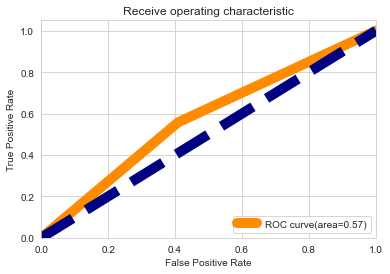

In [153]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Decision Tree Classifier

In [154]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

#train and score
dtc.fit(x_train,y_train)
dtc_score=dtc.score(x_train,y_train)

#predict
pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_test,pred_test),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Accuracy Training Score = 0.9906396255850234  Accuracy Test Score = 0.6583850931677019 

Training Confusion_Matrix 
 [[58 23]
 [32 48]] Testing Confusion_Matrix 
 [[58 23]
 [32 48]]
Classification Report 
               precision    recall  f1-score   support

           0       0.64      0.72      0.68        81
           1       0.68      0.60      0.64        80

    accuracy                           0.66       161
   macro avg       0.66      0.66      0.66       161
weighted avg       0.66      0.66      0.66       161



## Cross Validation with Model

In [155]:
from sklearn.model_selection import cross_val_score

train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

for i in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.6309226932668329 Training Score  0.9906396255850234 Testing Score  0.6583850931677019
A cross-fold  3 CV_mean  0.6359774162893398 Training Score  0.9906396255850234 Testing Score  0.6583850931677019
A cross-fold  4 CV_mean  0.6384950248756219 Training Score  0.9906396255850234 Testing Score  0.6583850931677019
A cross-fold  5 CV_mean  0.6247360248447206 Training Score  0.9906396255850234 Testing Score  0.6583850931677019
A cross-fold  6 CV_mean  0.6597276774024614 Training Score  0.9906396255850234 Testing Score  0.6583850931677019
A cross-fold  7 CV_mean  0.6223493516399695 Training Score  0.9906396255850234 Testing Score  0.6583850931677019
A cross-fold  8 CV_mean  0.6335024752475247 Training Score  0.9906396255850234 Testing Score  0.6583850931677019
A cross-fold  9 CV_mean  0.6309890414759328 Training Score  0.9906396255850234 Testing Score  0.6583850931677019


## Cross Validation at Selected Point

In [156]:
from sklearn.model_selection import cross_val_score

# accuracy score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#score and mean
cv_score =cross_val_score(dtc,x,y,cv=9)
cv_mean  =cv_score.mean()

# result
print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  9 CV_mean  0.6309751699264807 Training Score  0.9906396255850234 Testing Score  0.6583850931677019


# Model AOC_ROC_ Graph

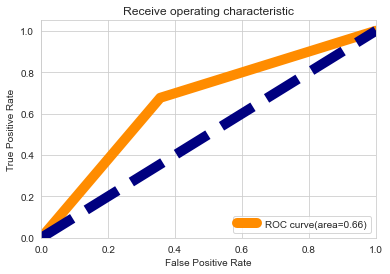

In [157]:
## AOC ROC score curve 
from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# KNeighbors Classifier

In [158]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

# train and score
knc.fit(x_train,y_train)
knc_score=knc.score(x_train,y_train)

#predict
pred_train= knc.predict(x_train)
pred_test = knc.predict(x_test)

#result
print("Training Score",knc_score)
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_test,pred_test),"\n","Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Training Score 0.7691107644305772
Accuracy Training Score = 0.7691107644305772  Accuracy Test Score = 0.6149068322981367 

Training Confusion_Matrix 
 [[64 17]
 [45 35]] 
 Testing Confusion_Matrix 
 [[64 17]
 [45 35]]
Classification Report 
               precision    recall  f1-score   support

           0       0.59      0.79      0.67        81
           1       0.67      0.44      0.53        80

    accuracy                           0.61       161
   macro avg       0.63      0.61      0.60       161
weighted avg       0.63      0.61      0.60       161



# Model Cross Validation

In [159]:
from sklearn.model_selection import cross_val_score

train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

for i in range(2,10):
    cv_score=cross_val_score(knc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.6097256857855362 Training Score  0.7691107644305772 Testing Score  0.6149068322981367
A cross-fold  3 CV_mean  0.6434074943633891 Training Score  0.7691107644305772 Testing Score  0.6149068322981367
A cross-fold  4 CV_mean  0.6459141791044776 Training Score  0.7691107644305772 Testing Score  0.6149068322981367
A cross-fold  5 CV_mean  0.6522127329192546 Training Score  0.7691107644305772 Testing Score  0.6149068322981367
A cross-fold  6 CV_mean  0.6496090973702914 Training Score  0.7691107644305772 Testing Score  0.6149068322981367
A cross-fold  7 CV_mean  0.6534270458755584 Training Score  0.7691107644305772 Testing Score  0.6149068322981367
A cross-fold  8 CV_mean  0.6534405940594059 Training Score  0.7691107644305772 Testing Score  0.6149068322981367
A cross-fold  9 CV_mean  0.6459148286863643 Training Score  0.7691107644305772 Testing Score  0.6149068322981367


In [160]:
#Selected cross fold 5 as cv_mean is near to testing score

#cross val score(K_neighbors)
knc_cv_score=cross_val_score(knc,x,y,cv=5) # cv_score is near to training score
knc_mean=knc_cv_score.mean()

#predict result
print(" Cross Validation_mean ",knc_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

 Cross Validation_mean  0.6522127329192546 Training Score  0.7691107644305772 Testing Score  0.6149068322981367


# Model AOC_ROC_Graph

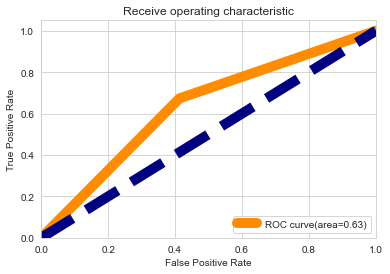

In [161]:
## AOC ROC score curve 
from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Support Vector Classifier

In [162]:
from sklearn.svm import SVC
svc=SVC()

#train and score
svc.fit(x_train,y_train)
svc_score=svc.score(x_train,y_train)

# predict
pred_train=svc.predict(x_train)
pred_test=svc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_test,pred_test),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Accuracy Training Score = 0.6583463338533542  Accuracy Test Score = 0.5900621118012422 

Training Confusion_Matrix 
 [[48 33]
 [33 47]] Testing Confusion_Matrix 
 [[48 33]
 [33 47]]
Classification Report 
               precision    recall  f1-score   support

           0       0.59      0.59      0.59        81
           1       0.59      0.59      0.59        80

    accuracy                           0.59       161
   macro avg       0.59      0.59      0.59       161
weighted avg       0.59      0.59      0.59       161



# Model Cross Validation

In [163]:
from sklearn.model_selection import cross_val_score
#score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val 
for i in range(2,10):
    cv_svc_score=cross_val_score(svc,x,y,cv=i)
    cv_mean=cv_svc_score.mean()    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.5773067331670823 Training Score  0.6583463338533542 Testing Score  0.5900621118012422
A cross-fold  3 CV_mean  0.5884901336016547 Training Score  0.6583463338533542 Testing Score  0.5900621118012422
A cross-fold  4 CV_mean  0.574794776119403 Training Score  0.6583463338533542 Testing Score  0.5900621118012422
A cross-fold  5 CV_mean  0.5822903726708074 Training Score  0.6583463338533542 Testing Score  0.5900621118012422
A cross-fold  6 CV_mean  0.5523416750832305 Training Score  0.6583463338533542 Testing Score  0.5900621118012422
A cross-fold  7 CV_mean  0.5772147760706113 Training Score  0.6583463338533542 Testing Score  0.5900621118012422
A cross-fold  8 CV_mean  0.5623143564356435 Training Score  0.6583463338533542 Testing Score  0.5900621118012422
A cross-fold  9 CV_mean  0.5598557358856985 Training Score  0.6583463338533542 Testing Score  0.5900621118012422


### Selected cross fold 9 as score to test accuracy

In [164]:
# selected cross_fold 9 as cv_score is near to testing score

#cross val score
svc_cv_score=cross_val_score(svc,x,y,cv=9)
svc_mean=svc_cv_score.mean()

print(" CV_mean ",svc_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

 CV_mean  0.5598557358856985 Training Score  0.6583463338533542 Testing Score  0.5900621118012422


# # AUC_ROC_Graph

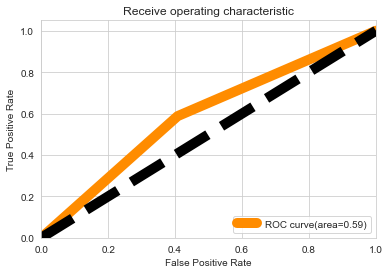

In [165]:
## AOC ROC score curve 
from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

In [166]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

#train and score
gnb.fit(x_train,y_train)
gnb_score=gnb.score(x_train,y_train)

# predict
pred_train=gnb.predict(x_train)
pred_test=gnb.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_test,pred_test),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.5772230889235569  Accuracy Test Score = 0.577639751552795 

Training Confusion_Matrix 
 [[30 51]
 [17 63]] Testing Confusion_Matrix 
 [[30 51]
 [17 63]]
Classification Report 
               precision    recall  f1-score   support

           0       0.64      0.37      0.47        81
           1       0.55      0.79      0.65        80

    accuracy                           0.58       161
   macro avg       0.60      0.58      0.56       161
weighted avg       0.60      0.58      0.56       161



## Model Cross Validation

In [167]:
from sklearn.model_selection import cross_val_score
#score
gnb_train=accuracy_score(y_train,pred_train)
gnb_test=accuracy_score(y_test,pred_test)

#cross val 
for i in range(2,10):
    cv_gnb_score=cross_val_score(gnb,x,y,cv=i)
    cv_mean=cv_gnb_score.mean()    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",gnb_train,"Testing Score ",gnb_test)

A cross-fold  2 CV_mean  0.5511221945137157 Training Score  0.5772230889235569 Testing Score  0.577639751552795
A cross-fold  3 CV_mean  0.5548474854193453 Training Score  0.5772230889235569 Testing Score  0.577639751552795
A cross-fold  4 CV_mean  0.5498880597014925 Training Score  0.5772230889235569 Testing Score  0.577639751552795
A cross-fold  5 CV_mean  0.5548059006211179 Training Score  0.5772230889235569 Testing Score  0.577639751552795
A cross-fold  6 CV_mean  0.5586260427187372 Training Score  0.5772230889235569 Testing Score  0.577639751552795
A cross-fold  7 CV_mean  0.5586248229268824 Training Score  0.5772230889235569 Testing Score  0.577639751552795
A cross-fold  8 CV_mean  0.5610891089108911 Training Score  0.5772230889235569 Testing Score  0.577639751552795
A cross-fold  9 CV_mean  0.5523234845332223 Training Score  0.5772230889235569 Testing Score  0.577639751552795


### Selected cross fold is 9 as its close to training score

In [168]:
#cross val score
cv_gnb_score=cross_val_score(gnb,x,y,cv=9)
gnb_mean=cv_gnb_score.mean()

print(" CV_mean ",gnb_mean,"Training Score ",gnb_train,"Testing Score ",gnb_test)

 CV_mean  0.5523234845332223 Training Score  0.5772230889235569 Testing Score  0.577639751552795


## Model AUC_ROC Graph

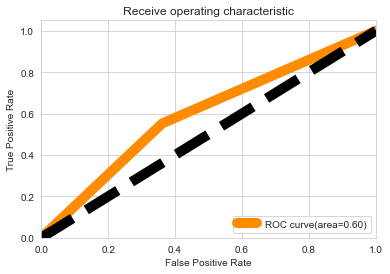

In [169]:
## AOC ROC score curve 
from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Ensamble Technique

## Extra Trees

In [170]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()

# train and score
etc.fit(x_train,y_train)
etc_score=etc.score(x_train,y_train)

#predict
pred_train=etc.predict(x_train)
pred_test=etc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.9906396255850234  Accuracy Test Score = 0.7018633540372671 

Training Confusion_Matrix 
 [[319   1]
 [  5 316]] Testing Confusion_Matrix 
 [[59 22]
 [26 54]]
Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        81
           1       0.71      0.68      0.69        80

    accuracy                           0.70       161
   macro avg       0.70      0.70      0.70       161
weighted avg       0.70      0.70      0.70       161



# Model Cross Validation

In [171]:
from sklearn.model_selection import cross_val_score
#
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,20):
    cv_etc_score=cross_val_score(etc,x,y,cv=i)
    cv_mean=cv_etc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.6907730673316708 Training Score  0.9906396255850234 Testing Score  0.7018633540372671
A cross-fold  3 CV_mean  0.7119691803156503 Training Score  0.9906396255850234 Testing Score  0.7018633540372671
A cross-fold  4 CV_mean  0.6920895522388061 Training Score  0.9906396255850234 Testing Score  0.7018633540372671
A cross-fold  5 CV_mean  0.7009006211180124 Training Score  0.9906396255850234 Testing Score  0.7018633540372671
A cross-fold  6 CV_mean  0.7133224853177721 Training Score  0.9906396255850234 Testing Score  0.7018633540372671
A cross-fold  7 CV_mean  0.7146997929606625 Training Score  0.9906396255850234 Testing Score  0.7018633540372671
A cross-fold  8 CV_mean  0.7083910891089109 Training Score  0.9906396255850234 Testing Score  0.7018633540372671
A cross-fold  9 CV_mean  0.7058537938687751 Training Score  0.9906396255850234 Testing Score  0.7018633540372671
A cross-fold  10 CV_mean  0.7008333333333333 Training Score  0.9906396255850234 Testing Score  0

### Selcted Cross fold is 7 as its close to traning Score

In [172]:
#cross val score
etc_cv_score=cross_val_score(etc,x,y,cv=7)
etc_mean=etc_cv_score.mean()

print(" CV_mean ",etc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.7060041407867494 Testing Accuracy Score  0.7018633540372671


### Model AUC_ROC

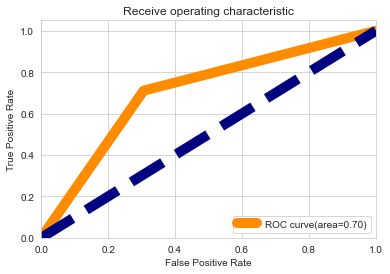

In [173]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# MLP Classifier

In [174]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()

#train
mlp.fit(x_train,y_train)
mlp_score=mlp.score(x_train,y_train)

#predict
pred_train=mlp.predict(x_train)
pred_test=mlp.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.6661466458658346  Accuracy Test Score = 0.5714285714285714 

Training Confusion_Matrix 
 [[218 102]
 [112 209]] Testing Confusion_Matrix 
 [[53 28]
 [41 39]]
Classification Report 
               precision    recall  f1-score   support

           0       0.56      0.65      0.61        81
           1       0.58      0.49      0.53        80

    accuracy                           0.57       161
   macro avg       0.57      0.57      0.57       161
weighted avg       0.57      0.57      0.57       161



# Model Cross Validation

In [175]:
from sklearn.model_selection import cross_val_score

train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_mlp_score=cross_val_score(mlp,x,y,cv=i)
    cv_mean=cv_mlp_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.4962593516209476 Training Score  0.6661466458658346 Testing Score  0.5714285714285714
A cross-fold  3 CV_mean  0.5896966478469078 Training Score  0.6661466458658346 Testing Score  0.5714285714285714
A cross-fold  4 CV_mean  0.5498569651741294 Training Score  0.6661466458658346 Testing Score  0.5714285714285714
A cross-fold  5 CV_mean  0.5797049689440994 Training Score  0.6661466458658346 Testing Score  0.5714285714285714
A cross-fold  6 CV_mean  0.5722702278083268 Training Score  0.6661466458658346 Testing Score  0.5714285714285714
A cross-fold  7 CV_mean  0.5884493843303912 Training Score  0.6661466458658346 Testing Score  0.5714285714285714
A cross-fold  8 CV_mean  0.5709158415841584 Training Score  0.6661466458658346 Testing Score  0.5714285714285714
A cross-fold  9 CV_mean  0.5772784019975031 Training Score  0.6661466458658346 Testing Score  0.5714285714285714


# Selected cross fold is 9 as its close to training score

In [176]:
#cross val score
mlp_cv_score=cross_val_score(mlp,x,y,cv=9)
cv_mean=mlp_cv_score.mean()

print(" CV_mean ",cv_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.5660563184907753 Testing Accuracy Score  0.5714285714285714


# Model AUC_ROC_GRaph

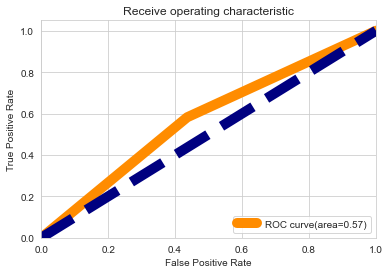

In [177]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

#random Forest Training and score
rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict random Forest
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)
      
#result random Forest
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.9906396255850234  Accuracy Test Score = 0.6645962732919255 

Training Confusion_Matrix 
 [[317   3]
 [  3 318]] Testing Confusion_Matrix 
 [[56 25]
 [29 51]]
Classification Report 
               precision    recall  f1-score   support

           0       0.66      0.69      0.67        81
           1       0.67      0.64      0.65        80

    accuracy                           0.66       161
   macro avg       0.66      0.66      0.66       161
weighted avg       0.66      0.66      0.66       161



# Model Cross Validation

In [179]:
from sklearn.model_selection import cross_val_score

#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val for model
for i in range(2,25):
    cv_rfc_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_rfc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.6683291770573566 Training Score  0.9906396255850234 Testing Score  0.6645962732919255
A cross-fold  3 CV_mean  0.6933031471854213 Training Score  0.9906396255850234 Testing Score  0.6645962732919255
A cross-fold  4 CV_mean  0.6909017412935323 Training Score  0.9906396255850234 Testing Score  0.6645962732919255
A cross-fold  5 CV_mean  0.685916149068323 Training Score  0.9906396255850234 Testing Score  0.6645962732919255
A cross-fold  6 CV_mean  0.6983784087083379 Training Score  0.9906396255850234 Testing Score  0.6645962732919255
A cross-fold  7 CV_mean  0.6910537212596709 Training Score  0.9906396255850234 Testing Score  0.6645962732919255
A cross-fold  8 CV_mean  0.700940594059406 Training Score  0.9906396255850234 Testing Score  0.6645962732919255
A cross-fold  9 CV_mean  0.6995838535164378 Training Score  0.9906396255850234 Testing Score  0.6645962732919255
A cross-fold  10 CV_mean  0.6995370370370371 Training Score  0.9906396255850234 Testing Score  0.6

### Selected cross val is 24 as its close to training score

In [180]:
# model cross val score
rfc_cv_score=cross_val_score(rfc,x,y,cv=24) 
rfc_mean=rfc_cv_score.mean()# mean value

print(" CV_mean ",rfc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.7144907983949079 Testing Accuracy Score  0.6645962732919255


### Model AUC_ROC_Graph

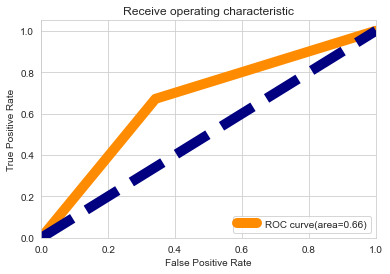

In [181]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Boosting technique

# Ada BOOST

In [182]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

ada.fit(x_train,y_train)
ada_score=ada.score(x_train,y_train)

#predict
pred_train=ada.predict(x_train)
pred_test=ada.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.6786271450858035  Accuracy Test Score = 0.6149068322981367 

Training Confusion_Matrix 
 [[210 110]
 [ 96 225]] Testing Confusion_Matrix 
 [[47 34]
 [28 52]]
Classification Report 
               precision    recall  f1-score   support

           0       0.63      0.58      0.60        81
           1       0.60      0.65      0.63        80

    accuracy                           0.61       161
   macro avg       0.62      0.62      0.61       161
weighted avg       0.62      0.61      0.61       161



# Model Cross Validation

In [183]:
from sklearn.model_selection import cross_val_score

#train and score for Ada Boost
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val for Ada Boost
for i in range(2,20):
    cv_ada_score=cross_val_score(ada,x,y,cv=i)
    cv_mean=cv_ada_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.5710723192019951 Training Score  0.6786271450858035 Testing Score  0.6149068322981367
A cross-fold  3 CV_mean  0.5673784634878044 Training Score  0.6786271450858035 Testing Score  0.6149068322981367
A cross-fold  4 CV_mean  0.5936753731343284 Training Score  0.6786271450858035 Testing Score  0.6149068322981367
A cross-fold  5 CV_mean  0.6073447204968945 Training Score  0.6786271450858035 Testing Score  0.6149068322981367
A cross-fold  6 CV_mean  0.6085643212508886 Training Score  0.6786271450858035 Testing Score  0.6149068322981367
A cross-fold  7 CV_mean  0.60737713849842 Training Score  0.6786271450858035 Testing Score  0.6149068322981367
A cross-fold  8 CV_mean  0.6073019801980197 Training Score  0.6786271450858035 Testing Score  0.6149068322981367
A cross-fold  9 CV_mean  0.6023026772090443 Training Score  0.6786271450858035 Testing Score  0.6149068322981367
A cross-fold  10 CV_mean  0.6222530864197531 Training Score  0.6786271450858035 Testing Score  0.6

#### Selected Cross Val is 16 as its close to Training Score

In [184]:
#Model_predict test
ada_test=ada.predict(x_test)

#cross val score
ada_cv_score=cross_val_score(ada,x,y,cv=16) 
ada_mean=ada_cv_score.mean()

print(" CV_mean ",ada_mean,"Testing Accuracy Score ",accuracy_score(y_test,ada_test))

 CV_mean  0.6035294117647059 Testing Accuracy Score  0.6149068322981367


### Model AUC_ROC_Graph

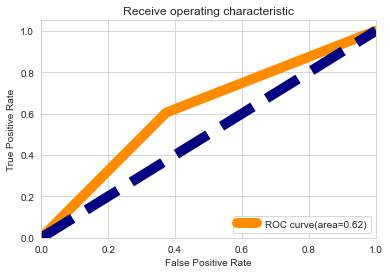

In [185]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting

In [186]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

#train and score gradient Boosting Classifier
gbc.fit(x_train,y_train)
gbc_score=gbc.score(x_train,y_train)

#predict Gradient Boosting Classifier
pred_train=gbc.predict(x_train)
pred_test=gbc.predict(x_test)

#result gradient Boosting classifier
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.8081123244929798  Accuracy Test Score = 0.6832298136645962 

Training Confusion_Matrix 
 [[250  70]
 [ 53 268]] Testing Confusion_Matrix 
 [[50 31]
 [20 60]]
Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.62      0.66        81
           1       0.66      0.75      0.70        80

    accuracy                           0.68       161
   macro avg       0.69      0.68      0.68       161
weighted avg       0.69      0.68      0.68       161



# Model Cross_Validation_Score

In [187]:
from sklearn.model_selection import cross_val_score

#predict model 
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_gbc_score=cross_val_score(gbc,x,y,cv=i)
    cv_mean=cv_gbc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.5785536159600997 Training Score  0.8081123244929798 Testing Score  0.6832298136645962
A cross-fold  3 CV_mean  0.6209821678126223 Training Score  0.8081123244929798 Testing Score  0.6832298136645962
A cross-fold  4 CV_mean  0.6622201492537313 Training Score  0.8081123244929798 Testing Score  0.6832298136645962
A cross-fold  5 CV_mean  0.6610093167701864 Training Score  0.8081123244929798 Testing Score  0.6832298136645962
A cross-fold  6 CV_mean  0.6547338495492463 Training Score  0.8081123244929798 Testing Score  0.6832298136645962
A cross-fold  7 CV_mean  0.6524354364171298 Training Score  0.8081123244929798 Testing Score  0.6832298136645962
A cross-fold  8 CV_mean  0.6460396039603961 Training Score  0.8081123244929798 Testing Score  0.6832298136645962
A cross-fold  9 CV_mean  0.6596892772922736 Training Score  0.8081123244929798 Testing Score  0.6832298136645962


### Selected  Cross Fold 5 as cv_score is close to training score

In [188]:
#dtc_predict test
gbc_test=gbc.predict(x_test)

#cross val score
gbc_cv_score=cross_val_score(gbc,x,y,cv=9)
gbc_mean=gbc_cv_score.mean()

print(" CV_mean ",gbc_mean,"Testing Accuracy Score ",accuracy_score(y_test,gbc_test))

 CV_mean  0.6596892772922736 Testing Accuracy Score  0.6832298136645962


### Model_AUC_ROC_ Graph

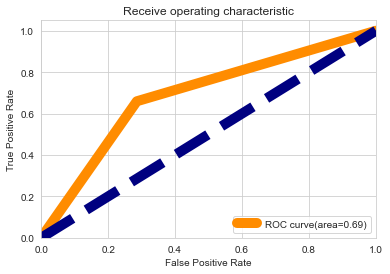

In [189]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Hyper-parameter with Models

- Random Forest Classifier
- Extra Trees Classifier 

* selected both Training and testing accuracy along cv is better then other models. ROC score is better

# Random Forest

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()

parameter={'n_estimators':list(range(100,105)),
    'criterion':['entropy','gini', 'log_loss'],
           'max_features':['None','sqrt', 'log2'],
          'class_weight':['balanced', 'balanced_subsample']}

gsv=GridSearchCV(rf,parameter,cv=10)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Params ",gsv.best_params_,)

Best Score  0.6832932692307693 Best Params  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}


In [193]:
#import lib with best parameters
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(ccp_alpha = 0.0000001,class_weight='balanced', criterion='entropy',max_features='log2',min_impurity_decrease=0.000001,
                           min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf= 0.0,n_jobs=3,random_state=14,verbose= 0)

#train model
rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Testing Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.9890795631825273  Accuracy Test Score = 0.6956521739130435 

Training Confusion_Matrix 
 [[316   4]
 [  3 318]] Testing Confusion_Matrix 
 [[60 21]
 [28 52]]
Classification Testing Report 
               precision    recall  f1-score   support

           0       0.68      0.74      0.71        81
           1       0.71      0.65      0.68        80

    accuracy                           0.70       161
   macro avg       0.70      0.70      0.69       161
weighted avg       0.70      0.70      0.69       161



### Model Cross Val Score

In [194]:
from sklearn.model_selection import cross_val_score

#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_rfc_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_rfc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.6433915211970075 Training Score  0.9890795631825273 Testing Score  0.6956521739130435
A cross-fold  3 CV_mean  0.6920686828032124 Training Score  0.9890795631825273 Testing Score  0.6956521739130435
A cross-fold  4 CV_mean  0.6846703980099502 Training Score  0.9890795631825273 Testing Score  0.6956521739130435
A cross-fold  5 CV_mean  0.6971195652173913 Training Score  0.9890795631825273 Testing Score  0.6956521739130435
A cross-fold  6 CV_mean  0.709647252459507 Training Score  0.9890795631825273 Testing Score  0.6956521739130435
A cross-fold  7 CV_mean  0.6923831317423995 Training Score  0.9890795631825273 Testing Score  0.6956521739130435
A cross-fold  8 CV_mean  0.7033910891089109 Training Score  0.9890795631825273 Testing Score  0.6956521739130435
A cross-fold  9 CV_mean  0.7070606186711056 Training Score  0.9890795631825273 Testing Score  0.6956521739130435


#### Selected Cross Fold is  as training score is close to cv_score

In [196]:
# Cross val score(Random Forest)
rfc_cv_score=cross_val_score(rfc,x,y,cv=6)#cv score would increase with cv increase
rfc_mean=rfc_cv_score.mean()

print(" CV_Score ",rfc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_Score  0.709647252459507 Testing Accuracy Score  0.6956521739130435


### Model AUC_ROC_Graph 

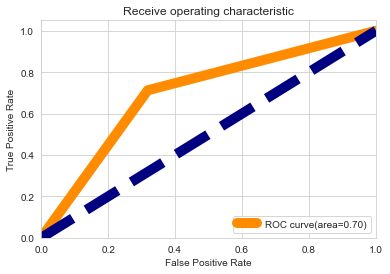

In [197]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Extra Trees Classifier

In [200]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

etc= ExtraTreesClassifier()

#Parameter  
parameters={'criterion':['gini', 'entropy', 'log_loss'],
           'max_features':['sqrt', 'log2','None'],
           'class_weight':['balanced','balanced_subsample'],
            'ccp_alpha':[0.0000001,0.0000001],
            'min_impurity_decrease':[0.00000001,0.0000001,0.0000001,0.000000001]}

gsv=GridSearchCV(etc,parameters,cv=7)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'ccp_alpha': 1e-07, 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'min_impurity_decrease': 1e-08} Best Score  0.6941676336086273


In [202]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(ccp_alpha= 0.000000001, class_weight= 'balanced', criterion= 'gini', max_features= 'sqrt', 
                         min_impurity_decrease= 1e-08, min_samples_leaf = 1, min_samples_split= 3, n_jobs= 3)

# train and score
etc.fit(x_train,y_train)
etc_score=etc.score(x_train,y_train)

#predict
pred_train=etc.predict(x_train)
pred_test=etc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.9906396255850234  Accuracy Test Score = 0.7080745341614907 

Training Confusion_Matrix 
 [[318   2]
 [  4 317]] Testing Confusion_Matrix 
 [[58 23]
 [24 56]]
Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.72      0.71        81
           1       0.71      0.70      0.70        80

    accuracy                           0.71       161
   macro avg       0.71      0.71      0.71       161
weighted avg       0.71      0.71      0.71       161



# Cross Validation with Model

In [203]:
from sklearn.model_selection import cross_val_score

#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_etc_score=cross_val_score(etc,x,y,cv=i)
    cv_mean=cv_etc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_Score ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_Score  0.6783042394014962 Training Score  0.9906396255850234 Testing Score  0.7080745341614907
A cross-fold  3 CV_Score  0.7107440326457599 Training Score  0.9906396255850234 Testing Score  0.7080745341614907
A cross-fold  4 CV_Score  0.6896082089552239 Training Score  0.9906396255850234 Testing Score  0.7080745341614907
A cross-fold  5 CV_Score  0.7170496894409937 Training Score  0.9906396255850234 Testing Score  0.7080745341614907
A cross-fold  6 CV_Score  0.7032974226611305 Training Score  0.9906396255850234 Testing Score  0.7080745341614907
A cross-fold  7 CV_Score  0.7159529257927427 Training Score  0.9906396255850234 Testing Score  0.7080745341614907
A cross-fold  8 CV_Score  0.7021039603960396 Training Score  0.9906396255850234 Testing Score  0.7080745341614907
A cross-fold  9 CV_Score  0.7021084755167153 Training Score  0.9906396255850234 Testing Score  0.7080745341614907


#### Selected Cross fold is 7 as cv score is close to test_accuracy_score

In [206]:
# Cross val score(Random Forest)
etc_cv_score=cross_val_score(etc,x,y,cv=7)#cv score would increase with cv increase
etc_mean=etc_cv_score.mean()

print(" CV_Score ",etc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_Score  0.7146562057317205 Testing Accuracy Score  0.7080745341614907


# Model AUC_ROC_Curve

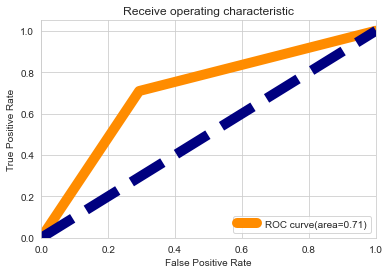

In [207]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

### However Extra Trees Models is working at the best of 71 percentage we will select it

- Selecting Extra Trees as Traning score little better along with cv score.

# Saving Model

In [208]:
import pickle
filename="loan_pred.pkl"
pickle.dump(etc, open(filename, 'wb'))

In [209]:
import pickle
model = pickle.load(open('loan_pred.pkl', 'rb'))
result=model.score(x_test,y_test)
print(result*100)

70.80745341614907


In [210]:
conclusion=pd.DataFrame([model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])

In [211]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
Predicted,1,0,0,0,1,0,1,1,1,1,...,0,1,0,0,0,1,1,1,1,0
Original,1,0,0,0,1,0,1,1,1,1,...,0,1,0,0,0,1,1,1,1,0
